In [1]:
from IPython.display import IFrame

In [2]:
%time

# pip install tqdm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

class GameBoard(object):
    def __init__(self, Current='x'):
        self.board = np.zeros((3, 3)).astype(int)
        self.over = False
        self.winner = None
        self.markX = {'Symbol': 'X','value': 2}
        self.mark0 = {'Symbol': 'O','value': 1}
        self.Vacant = {'Symbol': ' ','value': 0}
        if Current.lower() == 'x':
            self.Current, self.Opponent = (self.markX, self.mark0)
        else:
            self.Current, self.Opponent =(self.mark0, self.markX)
        
    def whatIS(self, val):
        if val == self.markX.get('value'):
            return self.markX.get('Symbol')
        elif val == self.mark0.get('value'):
            return self.mark0.get('Symbol')
        else:
            return self.Vacant.get('Symbol')

    def show(self):
        vals = []
        for i in range(3*3):
            vals.append(self.whatIS(self.board.item(i)) )
       
        board = "|-----------|\n| {} | {} | {} |\n|-----------|\n| {} | {} | {} |\n|-----------|\n| {} | {} | {} |\n|-----------|".format(*vals)
        
        print(board)

        def areEqual(self, axis, val, x, y):
        result = True
        i = j = 0
        if axis == 0:
            pos, loc, ignore_id = (j, x, y)
        else:
            pos, loc, ignore_id =(i, y, x)
        while pos < 3:
            if pos != ignore_id:
                if axis == 0:
                    board_val = self.board[loc][pos]
                else:
                    board_val = self.board[pos][loc]
                if board_val != val or board_val == 0: # Vacant spot is present
                    result = False
                    break
            pos += 1
        return result
    
    def checkLeftDiag(self, val, x):
        i = j = 0
        result = True
        while i < 3:
            if i != x:
                if self.board[i][j] != val or self.board[i][j] == 0:
                    result = False
                    break
            i += 1
            j += 1
        return result

    def checkRightDiag(self, val, x):
        result = True
        i = 0
        j = 3 - 1
        while i < 3:
            if i != x:
                if self.board[i][j] != val or self.board[i][j] == 0:
                    result = False
                    break
            i += 1
            j -= 1
        return result

    def checkColumn(self, val, x, y):
        return self.areEqual(1, val, x, y)

    def checkRow(self, val, x, y):
        return self.areEqual(0, val, x, y)
    
    def check_diagnols(self, val, x, y):
        if x == y and x + y == 3 - 1:
            return self.checkLeftDiag(val, x) or self.checkRightDiag(val, x)
        if x == y:
            return self.checkRightDiag(val, x)
        if x + y == 3 - 1:
            return self.checkRightDiag(val, x)
        return False
    
    def gameOver(self, player, val, x, y):
        game_state = self.checkColumn(val, x, y) or self.checkRow(val, x, y) or self.check_diagnols(val, x, y)
        return game_state
    
    def draw(self):
        x, y = np.where(self.board == 0)
        if len(x) == 0 and len(y) == 0:
            self.over = True
        return self.over

    def make_move(self, mark, x, y):
        symbol = None
        if mark == self.mark0.get('Symbol'):
            symbol = self.mark0
        elif mark == self.markX.get('Symbol'):
            symbol = self.markX
        else:
            # invalid symbol
            raise Exception('spam', 'eggs')
            return
        if self.board[x][y] == 0:
            self.board[x][y] = symbol.get('value')
            self.show()
            if self.gameOver(symbol.get('Symbol'), symbol.get('value'), x, y):
                self.winner = symbol.get('Symbol')
                print('Winner is: '+str(self.winner))
                return self.winner
            elif self.draw():
                print('Draw')
                return 'draw'
            
    def play_1(self, x, y):
        if x > 2 or y > 2:
            raise Exception('Invalid', self.Current.get('Symbol'))
        self.make_move(self.Current.get('Symbol'), x, y)
        
    def play_2(self, x, y):
        if x > 2 or y > 2:
            Exception('Invalid', self.Current.get('Symbol'))
        self.make_move(self.Opponent.get('Symbol'), x, y)

CPU times: total: 0 ns
Wall time: 0 ns


In [3]:
game = GameBoard()
game.play_1(2,2)
game.play_2(1,0)
game.play_1(0,0)

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|


In [4]:
class Agent(object):
    def __init__(self, smart = False):
        self.states = {}
        self.actionsTaken = []
        self.lrl = 0.5
        self.discount = 0.01
        if smart:
            self.Epsilon = 0
        else:
            self.Epsilon = 0.2
    
    def UpdateAgentPolicy(self, reward, S1, S0):
        current = self.states.get(S0, np.zeros((3,3)))
        return self.lrl * ((reward * self.states[S1]) - current)

    def takeAction(self, current, action):
        S0 = ""
        temp = current.flatten()
        for i in temp.flatten().tolist():
            S0 = S0 + str(i)
        self.actionsTaken.append((S0, action))

    def backPropogate(self, reward):
        
        if len(self.actionsTaken) == 0:
            return None

        S1, acted = self.actionsTaken.pop()
        self.states[S1] = np.zeros((3,3))
        self.states[S1].itemset(acted, reward)
        while self.actionsTaken:
            S0, action = self.actionsTaken.pop()
            reward *= self.discount
            if S0 in self.states:
                reward += self.UpdateAgentPolicy(reward, S1, S0).item(acted)
                self.states[S0].itemset(action, reward)
            else:
                self.states[S0] = np.zeros((3,3))
                reward = self.UpdateAgentPolicy(reward, S1, S0).item(acted)
                self.states[S0].itemset(action, reward)          
            S1 = S0
            acted = action
            
    def play(self, board):
        S0 = ""
        temp = board.flatten()
        for i in temp.flatten().tolist():
            S0 = S0 + str(i)
        exploration = np.random.random() < self.Epsilon
        
        if exploration or S0 not in self.states:
            action = self.explore(board)
        else:
            action = self.exploit(S0)

        self.takeAction(board, action)
        return action

    def explore(self, board):
        print("Exploring")
        xs, ys = np.where(board == 0)
        vacant = [(x, y) for x, y in zip(xs, ys)]
        rand = np.random.choice(len(vacant))
        return vacant[rand]
        
    def exploit(self, S0):
        state_values = self.states[S0]
        print("Exploiting")
        print('State-Values')
        print(state_values)
        heatmap = plt.imshow(state_values, cmap="gray")
        print(heatmap)
        plt.show()
        bestAct = state_values.max()
        best_Ax, best_Ay = np.where(state_values == bestAct)
        
        best = [(x, y) for x,y in zip(best_Ax, best_Ay)]
        rand = np.random.choice(len(best))
        return best[rand]
    
def endGame(game, p1, p2):
    if game.winner == 'X':
        p1.backPropogate(1)
        p2.backPropogate(-1)
    elif game.winner == 'O':
        p1.backPropogate(-1)
        p2.backPropogate(1)
    
def train(n_games, p1, p2):

    Players = [{'self': p1, 'name': 'AIPlayer 1', 'sym': 'X'},
            {'self': p2, 'name': 'AIPlayer 2', 'sym': 'O'}]

    Winners = pd.DataFrame(columns=['AIPlayer 1', 'AIPlayer 2'])

    for i in tqdm(range(n_games)):
        print("\n\n")
        print('Game: '+ str(i + 1))
        game = GameBoard()
        while not game.over and not game.winner:
            for P in Players:
                winner = game.make_move(P['sym'], *P['self'].play(game.board))
                if winner:
                    # Make ammends for rewards
                    print(winner + " has won the game")
                    endGame(game, p1, p2)
                    Winners.at[i, P['name']] = 1
                    break
                elif winner == 'draw':
                    for pla in Players:
                        Winners.at[i, pla['name']] = 0
                    break
    return Winners

%time

CPU times: total: 0 ns
Wall time: 0 ns


CPU times: total: 0 ns
Wall time: 0 ns


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]




Game: 1
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   |   | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
|   |   | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O |   | X |
|-----------|
| O | X | O |
|-----------|
Winner is: O
O has won the game



Game: 2
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+0

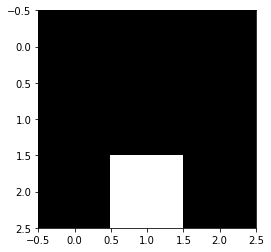

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[7.8125e-17 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


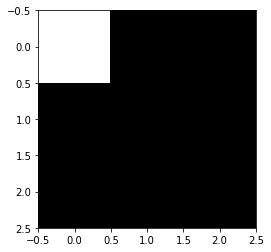

|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


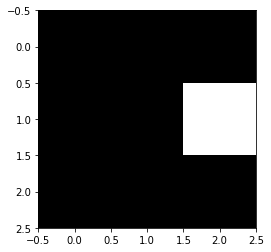

  2%|█▋                                                                                | 2/100 [00:00<00:31,  3.16it/s]

|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   | X | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| O | O | O |
|-----------|
|   | X | X |
|-----------|
| O | X | X |
|-----------|
Winner is: O
O has won the game



Game: 3
Exploring
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|--------

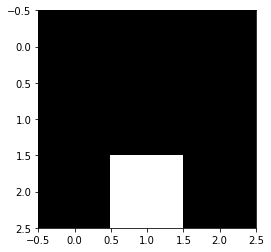

  4%|███▎                                                                              | 4/100 [00:00<00:18,  5.25it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   |   | O |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 5
Exploiting
State-Values
[[0.0000e+00 7.8125e-19 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 5.0125e-05 0.0000e+00]]
AxesImage(size=(3, 3))


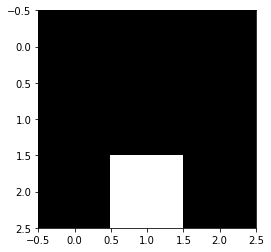

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[ 5.00637531e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


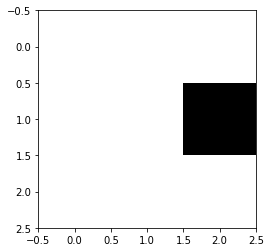

|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 5.0125e-05]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


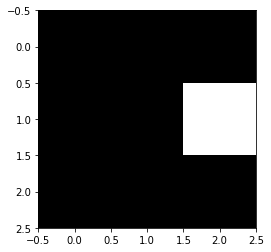

|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00000e+00 5.00625e-05 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00]
 [1.25000e-07 0.00000e+00 0.00000e+00]]
AxesImage(size=(3, 3))


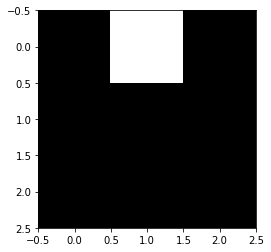

  5%|████                                                                              | 5/100 [00:01<00:33,  2.80it/s]

|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| O | O | O |
|-----------|
|   |   | X |
|-----------|
| X | X |   |
|-----------|
Winner is: O
O has won the game



Game: 6
Exploiting
State-Values
[[ 0.0000e+00  7.8125e-19  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


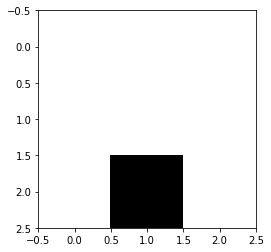

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[7.8125e-17 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


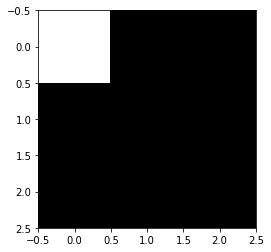

|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]]
AxesImage(size=(3, 3))


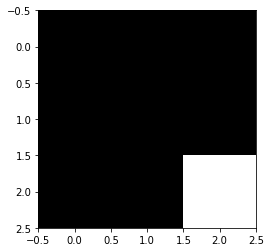

|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]]
AxesImage(size=(3, 3))


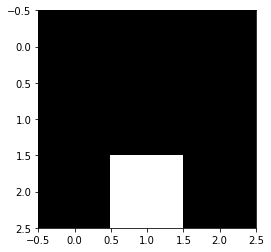

|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


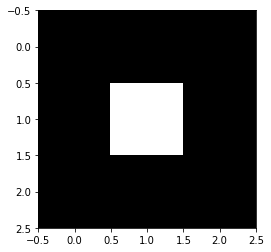

|-----------|
| O | X |   |
|-----------|
|   | X |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   | X | O |
|-----------|
|   | O | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


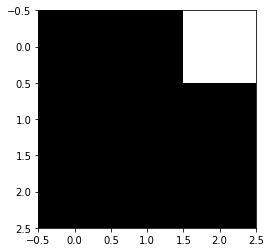

|-----------|
| O | X | X |
|-----------|
|   | X | O |
|-----------|
|   | O | X |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


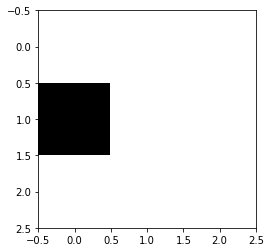

  6%|████▉                                                                             | 6/100 [00:02<01:00,  1.57it/s]

Exploring
|-----------|
| O | X | X |
|-----------|
|   | X | O |
|-----------|
| X | O | X |
|-----------|
Winner is: X
X has won the game



Game: 7
Exploiting
State-Values
[[ 0.00000000e+00  1.51136534e-08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98750000e-05  0.00000000e+00]]
AxesImage(size=(3, 3))


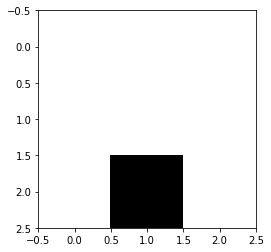

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


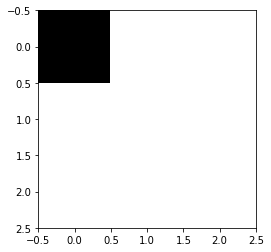

  7%|█████▋                                                                            | 7/100 [00:03<00:52,  1.76it/s]

|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| O | O | X |
|-----------|
Draw
draw has won the game



Game: 8
Exploiting
State-Values
[[ 0.00000000e+00  1.51136534e-08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00

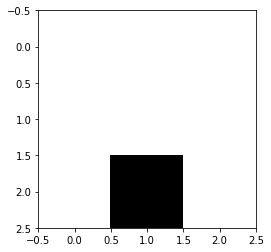

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


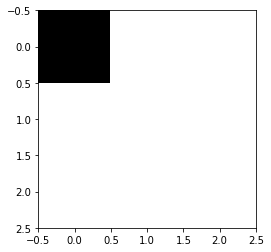

  8%|██████▌                                                                           | 8/100 [00:03<00:44,  2.07it/s]

Exploring
|-----------|
| X | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| X |   | O |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| X |   | O |
|-----------|
| O | O | X |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| X |   | O |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game



Game: 9
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


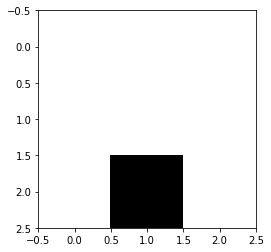

  9%|███████▍                                                                          | 9/100 [00:03<00:39,  2.29it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X |   |   |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | X |   |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | X | O |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game



Gam

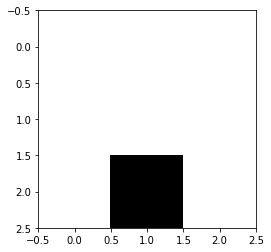

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[7.8125e-17 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


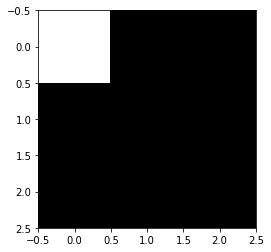

|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 7.8125e-17 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


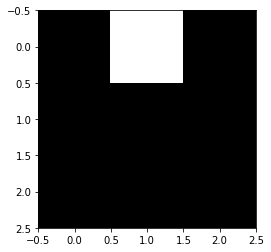

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


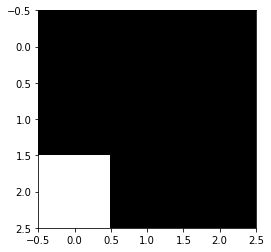

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 1.25e-07]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


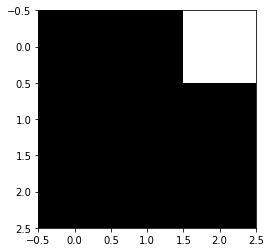

|-----------|
| O | X | X |
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.005 0.   ]]
AxesImage(size=(3, 3))


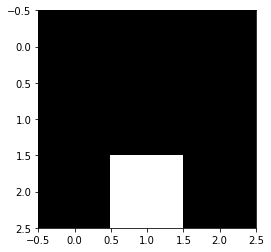

|-----------|
| O | X | X |
|-----------|
| X |   |   |
|-----------|
| O | O |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


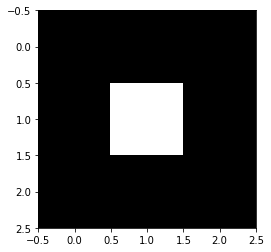

|-----------|
| O | X | X |
|-----------|
| X | X |   |
|-----------|
| O | O |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


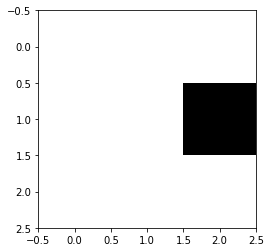

 10%|████████                                                                         | 10/100 [00:05<01:02,  1.44it/s]

Exploring
|-----------|
| O | X | X |
|-----------|
| X | X |   |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game



Game: 11
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[ 0.00015112  0.          0.        ]
 [ 0.          0.         -0.005     ]
 [ 0.          0.          0.        ]]
AxesImage(size=(3, 3))


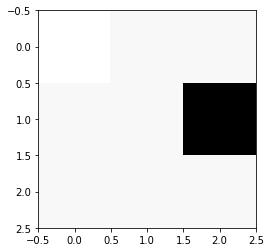

|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 1.50e-02 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


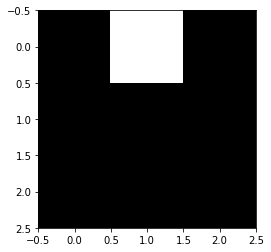

 11%|████████▉                                                                        | 11/100 [00:05<00:52,  1.71it/s]

|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| O | O | O |
|-----------|
|   |   | X |
|-----------|
| X | X |   |
|-----------|
Winner is: O
O has won the game



Game: 12
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.51136534e-08  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98750000e-05  0.00000000e+00]]
AxesImage(size=(3, 3))


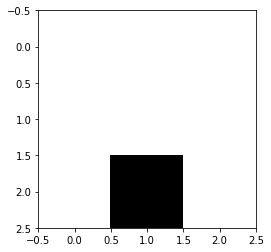

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 1.51136419e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


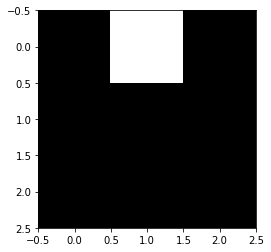

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  0.0000e+00  0.0000e+00]]
AxesImage(size=(3, 3))


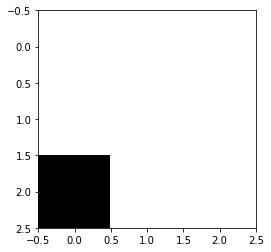

 12%|█████████▋                                                                       | 12/100 [00:06<00:48,  1.80it/s]

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X |   | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X |   | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | X | X |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Game: 13
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98750000e-05  0.00000000e+00]]
AxesImage(size=(3, 3))


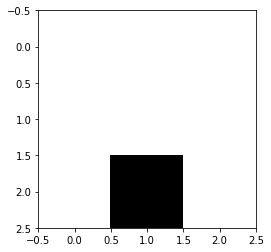

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[5.01262563e-07 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


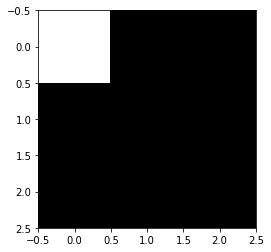

|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 1.25000008e-09 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


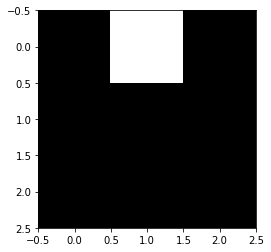

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  0.0000e+00  5.0125e-05]]
AxesImage(size=(3, 3))


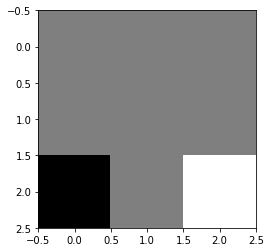

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


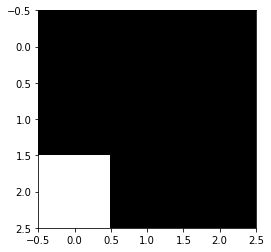

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.005 0.   ]]
AxesImage(size=(3, 3))


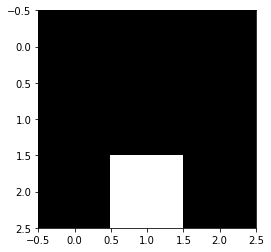

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
| X | O | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


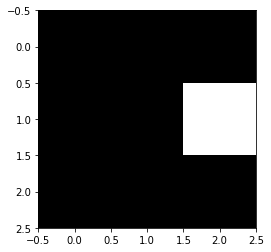

|-----------|
| O | X |   |
|-----------|
| X |   | X |
|-----------|
| X | O | O |
|-----------|
Exploiting
State-Values
[[ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


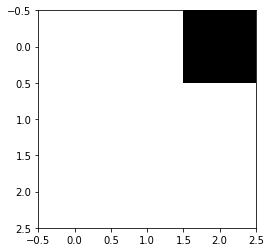

 13%|██████████▌                                                                      | 13/100 [00:07<01:11,  1.22it/s]

Exploring
|-----------|
| O | X |   |
|-----------|
| X | X | X |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Game: 14
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


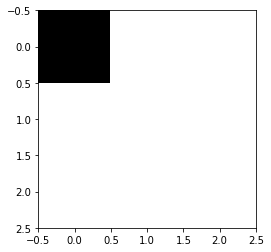

 14%|███████████▎                                                                     | 14/100 [00:07<00:54,  1.58it/s]

|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
| X | O |   |
|-----------|
Winner is: X
X has won the game



Game: 15
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-------

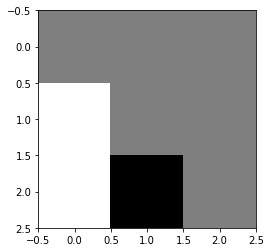

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


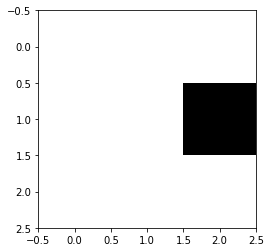

 17%|█████████████▊                                                                   | 17/100 [00:08<00:30,  2.72it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X |   |   |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X | O |   |
|-----------|
| X | X | O |
|-----------|
Winner is: O
O has won the game



Game: 18
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.00

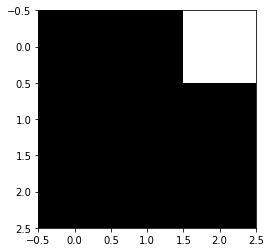

|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.0000e+00 7.8125e-17 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


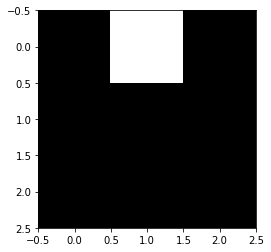

|-----------|
|   | X | O |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


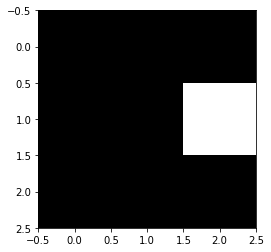

|-----------|
|   | X | O |
|-----------|
|   |   | O |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]]
AxesImage(size=(3, 3))


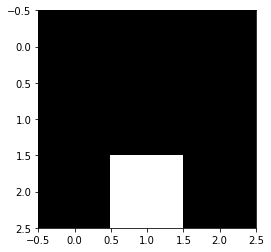

|-----------|
|   | X | O |
|-----------|
|   |   | O |
|-----------|
|   | X | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.005 0.    0.   ]]
AxesImage(size=(3, 3))


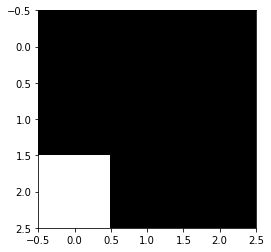

|-----------|
|   | X | O |
|-----------|
|   |   | O |
|-----------|
| O | X | X |
|-----------|
Exploiting
State-Values
[[0.005 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


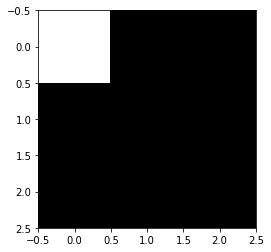

|-----------|
| X | X | O |
|-----------|
|   |   | O |
|-----------|
| O | X | X |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


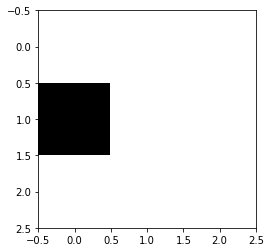

 18%|██████████████▌                                                                  | 18/100 [00:09<00:47,  1.74it/s]

Exploring
|-----------|
| X | X | O |
|-----------|
| X |   | O |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
Winner is: O
O has won the game



Game: 19
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.49387500e-05  0.00000000e+00  0.00000000e+00]
 [ 5.01250000e-05 -4.98750000e-05 -4.98737438e-09]]
AxesImage(size=(3, 3))


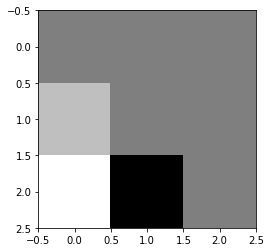

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


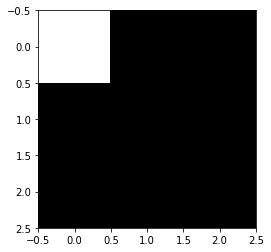

 19%|███████████████▍                                                                 | 19/100 [00:09<00:44,  1.80it/s]

|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O |   |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | O |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | O |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 20
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.49387500e-05  0.000000

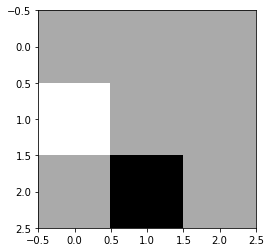

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00  2.50618781e-07]]
AxesImage(size=(3, 3))


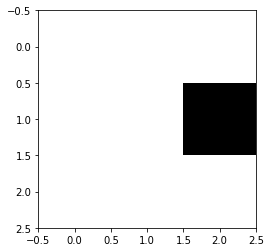

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]]
AxesImage(size=(3, 3))


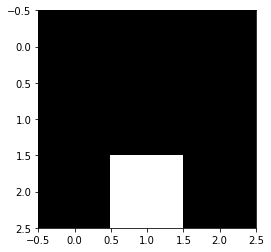

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


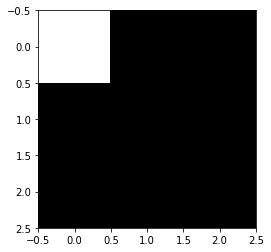

|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


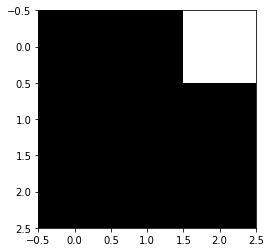

|-----------|
| O |   | X |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[0.    0.005 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


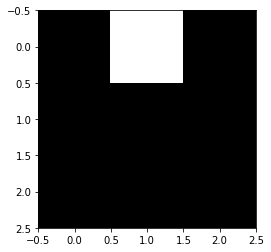

|-----------|
| O | O | X |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-1.  0.  0.]]
AxesImage(size=(3, 3))


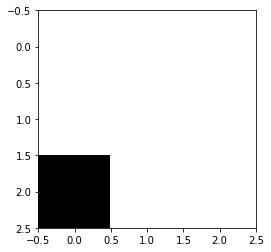

Exploring
|-----------|
| O | O | X |
|-----------|
| X | O |   |
|-----------|
|   | X | O |
|-----------|
Winner is: O
O has won the game


 20%|████████████████▏                                                                | 20/100 [00:11<01:00,  1.32it/s]




Game: 21
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.44387624e-05  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05 -4.98737438e-09]]
AxesImage(size=(3, 3))


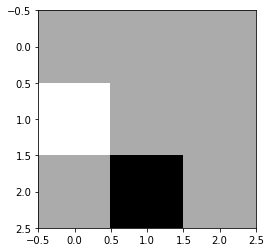

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00  1.76073298e-06]]
AxesImage(size=(3, 3))


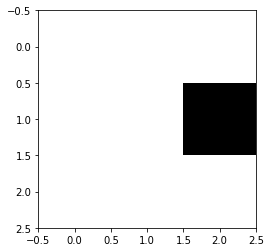

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


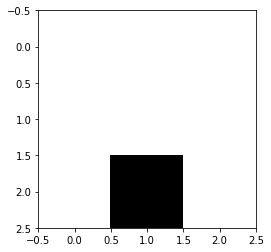

 21%|█████████████████                                                                | 21/100 [00:11<00:57,  1.38it/s]

|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
| X | O |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
| X | O |   |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| X | O |   |
|-----------|
|   | O | O |
|-----------|
Winner is: X
X has won the game



Game: 22
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 1.51136534e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


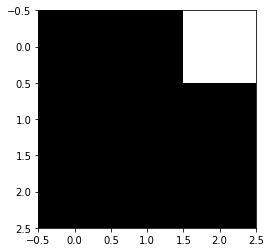

|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


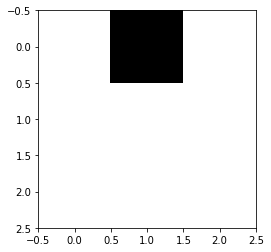

 22%|█████████████████▊                                                               | 22/100 [00:12<00:48,  1.61it/s]

|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
|   | X |   |
|-----------|
|   | O | X |
|-----------|
Winner is: X
X has won the game



Game: 23
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.01262563e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  1.51125000e-04]]
AxesImage(size=(3, 3))


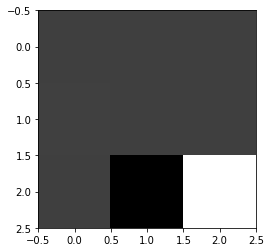

 23%|██████████████████▋                                                              | 23/100 [00:12<00:41,  1.85it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | O |   |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | O |   |
|-----------|
| X | O | X |
|-----------|
Winner is: O
O has won the game



Game: 24
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.01262563e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.98743687e-05]]
AxesImage(size=(3, 3))


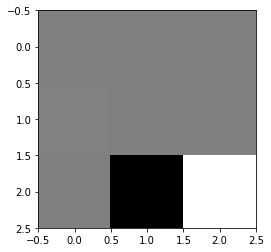

 24%|███████████████████▍                                                             | 24/100 [00:12<00:33,  2.30it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| O |   | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| O |   | X |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| O |   | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| O | X | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| O | X | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| O | X | X |
|-----------|
Draw
draw has won the game



Game: 25

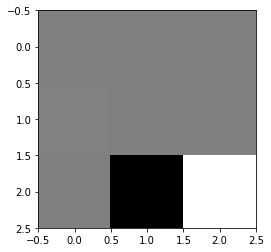

 25%|████████████████████▎                                                            | 25/100 [00:13<00:26,  2.79it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O | X |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O | X | O |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O | X | O |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| O | X | O |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| O | X | O |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 26
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.01262563e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


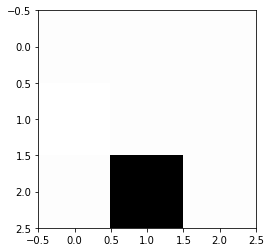

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00  5.01250000e-05]]
AxesImage(size=(3, 3))


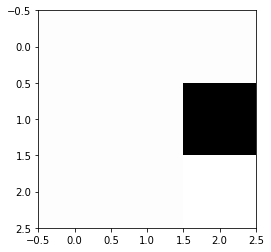

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  5.0125e-05]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


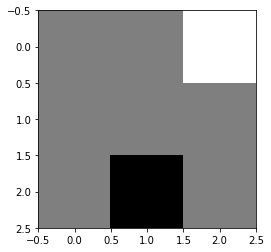

|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


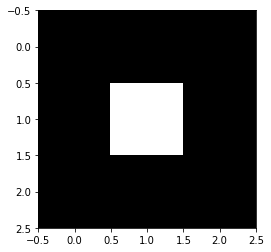

 26%|█████████████████████                                                            | 26/100 [00:13<00:35,  2.07it/s]

|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X | O |   |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | O |   |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | O | X |
|-----------|
| O | X | O |
|-----------|
Draw
draw has won the game



Game: 27
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.01262563e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


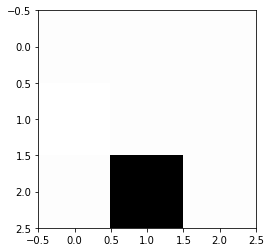

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00  5.01250000e-05]]
AxesImage(size=(3, 3))


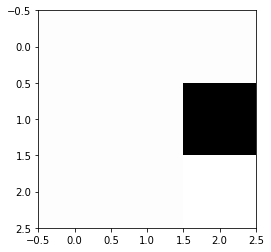

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  5.0125e-05]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


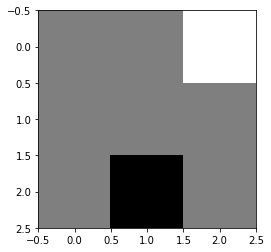

|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


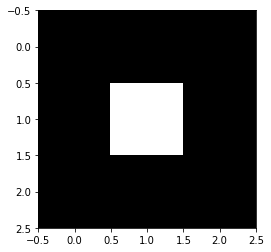

 27%|█████████████████████▊                                                           | 27/100 [00:14<00:41,  1.77it/s]

|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X | O |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X | O |   |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X | O |   |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X | O | O |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| X | O | O |
|-----------|
| O | X | O |
|-----------|
Winner is: X
X has won the game



Game: 28
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.46871829e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


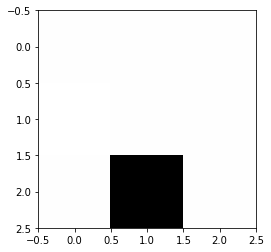

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00  1.25632141e-23]]
AxesImage(size=(3, 3))


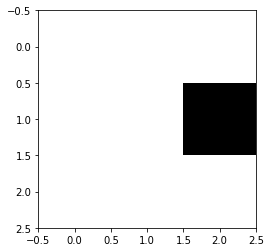

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  2.46868781e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98750000e-05  0.00000000e+00]]
AxesImage(size=(3, 3))


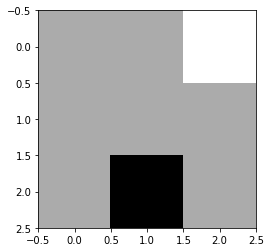

|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25632141e-21 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


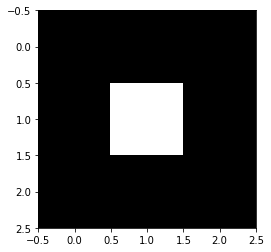

|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 5.01250e-05  5.00000e-03  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00 -2.50625e-05  0.00000e+00]]
AxesImage(size=(3, 3))


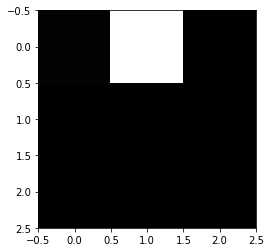

|-----------|
|   | X | X |
|-----------|
| X | O |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -1.  0.]]
AxesImage(size=(3, 3))


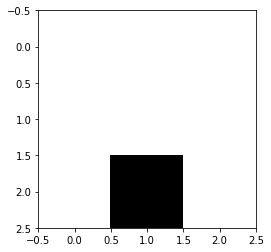

 28%|██████████████████████▋                                                          | 28/100 [00:15<00:52,  1.38it/s]

Exploring
|-----------|
|   | X | X |
|-----------|
| X | O |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
| X | O | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
| X | O | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| X | X | O |
|-----------|
Draw
draw has won the game



Game: 29
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.46871829e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


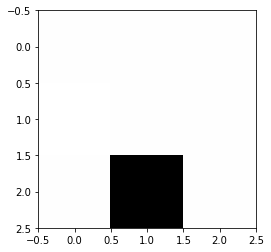

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00  1.25632141e-23]]
AxesImage(size=(3, 3))


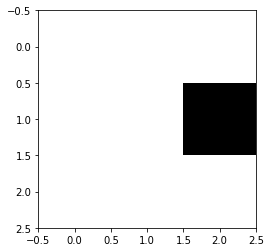

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  2.46868781e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98750000e-05  0.00000000e+00]]
AxesImage(size=(3, 3))


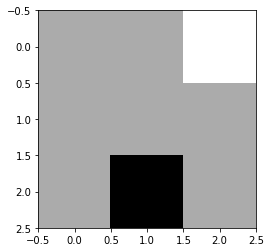

 29%|███████████████████████▍                                                         | 29/100 [00:16<00:47,  1.49it/s]

|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | X | O |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
| O | X | O |
|-----------|
Draw
draw has won the game



Game: 30
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.46871829e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


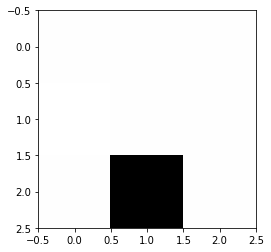

 30%|████████████████████████▎                                                        | 30/100 [00:16<00:36,  1.93it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X |   | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
| O | X | O |
|-----------|
Draw
draw has won the game



Game: 31

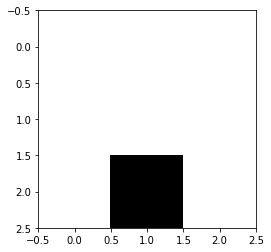

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -6.28160706e-24  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00 -1.39879456e-24]]
AxesImage(size=(3, 3))


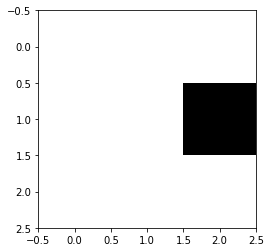

 32%|█████████████████████████▉                                                       | 32/100 [00:16<00:23,  2.86it/s]

|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X | X |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X | X | X |
|-----------|
| O |   | X |
|-----------|
Winner is: X
X has won the game



Game: 33
Exploiting
State-Values
[[ 1.25000008e-09  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


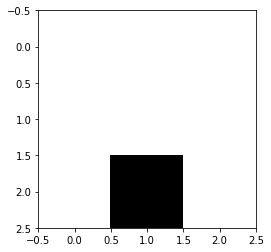

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


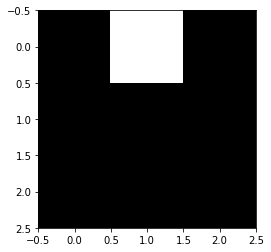

|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 1.25e-07]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


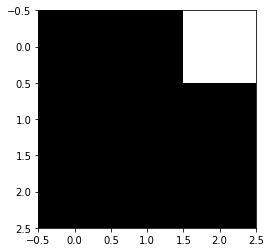

|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.005 0.   ]]
AxesImage(size=(3, 3))


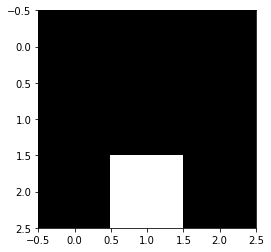

|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


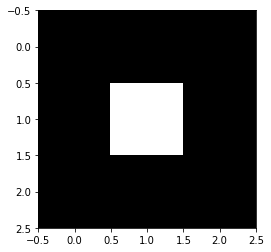

|-----------|
| X | O | X |
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


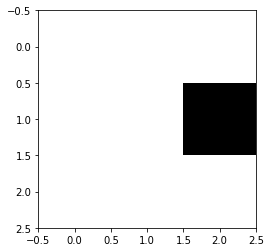

 33%|██████████████████████████▋                                                      | 33/100 [00:17<00:38,  1.76it/s]

|-----------|
| X | O | X |
|-----------|
|   | X |   |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | X |   |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | X |   |
|-----------|
| O | O | O |
|-----------|
Winner is: O
O has won the game



Game: 34
Exploiting
State-Values
[[-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-09  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


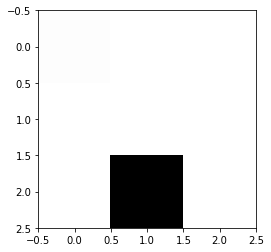

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -6.28160706e-24  5.01250000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00 -1.39879456e-24]]
AxesImage(size=(3, 3))


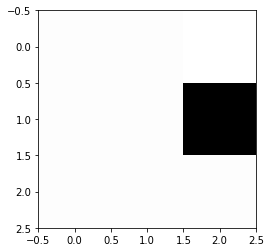

|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]]
AxesImage(size=(3, 3))


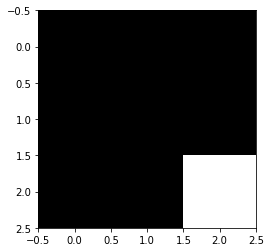

|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.005 0.    0.   ]]
AxesImage(size=(3, 3))


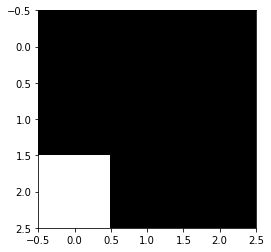

|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


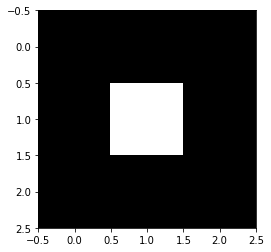

 34%|███████████████████████████▌                                                     | 34/100 [00:18<00:43,  1.50it/s]

|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X | X | O |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X | X | O |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | X | O |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
Draw
draw has won the game



Game: 35
Exploring
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | O | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | O | X |
|-----------|
| O |   |   |
|-----------|

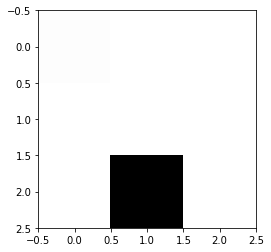

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  1.25000008e-09  0.00000000e+00]
 [ 4.65661520e-90  1.25000008e-09  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


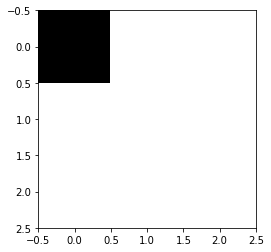

Exploiting
State-Values
[[7.8125e-17 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


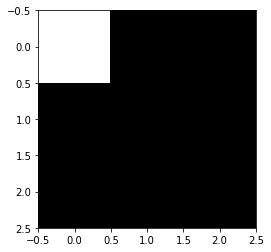

|-----------|
| X | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


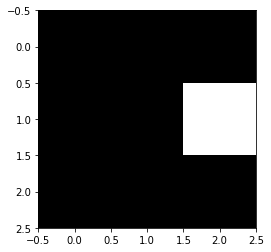

|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]]
AxesImage(size=(3, 3))


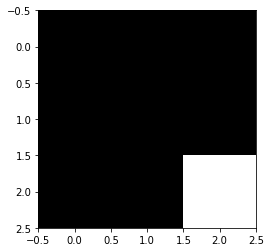

|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.005 0.    0.   ]]
AxesImage(size=(3, 3))


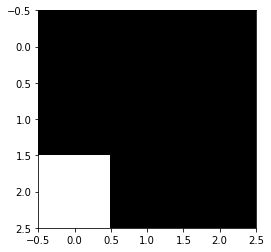

 36%|█████████████████████████████▏                                                   | 36/100 [00:19<00:38,  1.64it/s]

|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
|   |   | O |
|-----------|
| O |   | X |
|-----------|
Winner is: X
X has won the game



Game: 37
Exploiting
State-Values
[[-4.98737562e-07  1.76073298e-06  0.00000000e+00]
 [ 3.05175858e-49  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


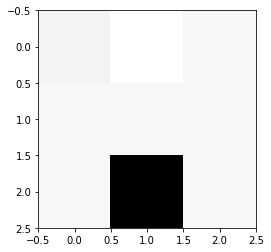

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 4.65661520e-90  1.25000008e-09  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


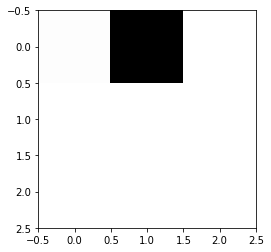

|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | O | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


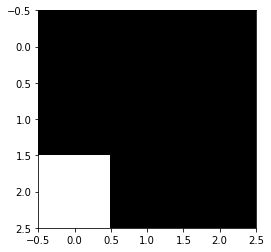

 37%|█████████████████████████████▉                                                   | 37/100 [00:20<00:38,  1.64it/s]

|-----------|
|   | X |   |
|-----------|
|   | O | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | O | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
|   | O | X |
|-----------|
| O |   | X |
|-----------|
Winner is: O
O has won the game



Game: 38
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 3.05175858e-49  0.00000000e+00  0.00000000e+00]
 [ 1.25000008e-11 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


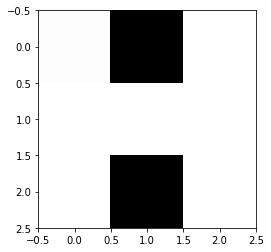

 38%|██████████████████████████████▊                                                  | 38/100 [00:20<00:31,  1.98it/s]

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   | O |   |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   | O | X |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Gam

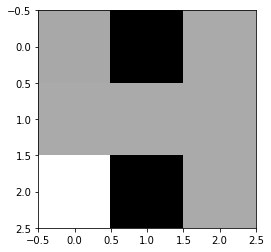

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
Exploiting
State-Values
[[ 0. -1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


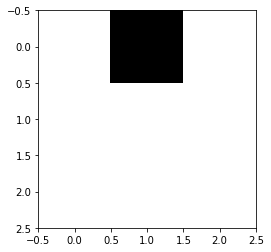

 39%|███████████████████████████████▌                                                 | 39/100 [00:21<00:28,  2.16it/s]

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
|   |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | X | O |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Game: 40
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 3.05175858e-49  0.00000000e+00  0.00000000e+00]
 [ 2.49375000e-05 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


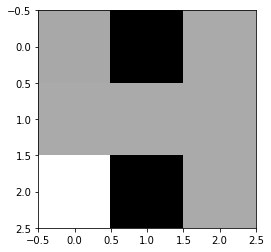

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[1.25000008e-09 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25000008e-09 6.25075189e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


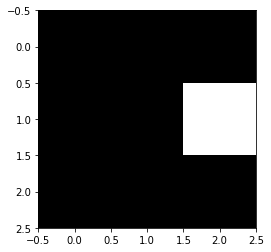

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 7.8125e-17 0.0000e+00]]
AxesImage(size=(3, 3))


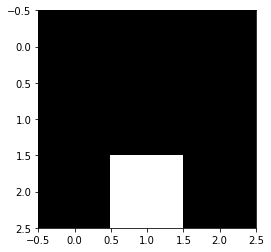

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
Exploiting
State-Values
[[ 0.         -1.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.50005013]]
AxesImage(size=(3, 3))


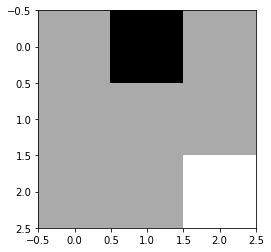

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X | X | O |
|-----------|
Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


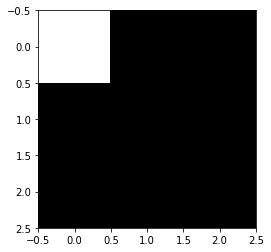

 40%|████████████████████████████████▍                                                | 40/100 [00:22<00:37,  1.60it/s]

|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O |   | O |
|-----------|
| X | X | O |
|-----------|
Winner is: O
O has won the game



Game: 41
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 3.05175858e-49  0.00000000e+00  0.00000000e+00]
 [ 2.44387624e-05 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


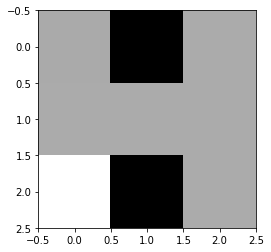

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[1.25000008e-09 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25000008e-09 1.51136419e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


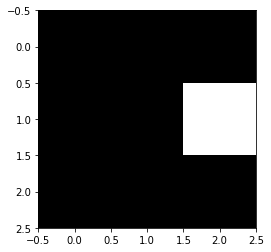

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


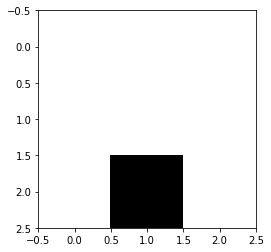

 41%|█████████████████████████████████▏                                               | 41/100 [00:22<00:35,  1.66it/s]

Exploring
|-----------|
| O |   |   |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   | X | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
|   | X | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
|   | X | O |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
|   | X | O |
|-----------|
| X | X | O |
|-----------|
Winner is: O
O has won the game



Game: 42
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 3.05175858e-49  0.00000000e+00  0.00000000e+00]
 [ 5.01262563e-07 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


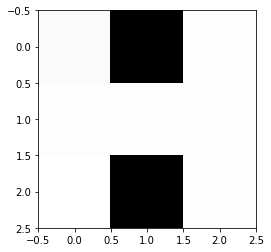

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[1.25000008e-09 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.25000008e-09 6.25000039e-10]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


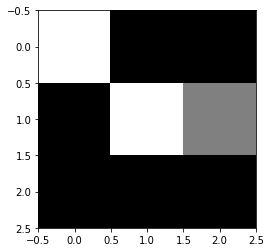

|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 7.8125e-17 0.0000e+00]]
AxesImage(size=(3, 3))


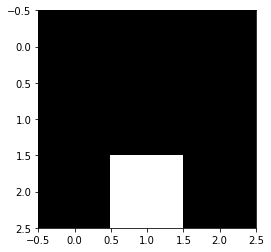

|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


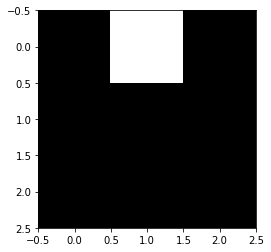

|-----------|
|   | O |   |
|-----------|
|   | O |   |
|-----------|
| X | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


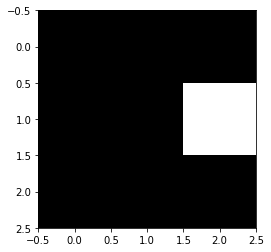

|-----------|
|   | O |   |
|-----------|
|   | O | X |
|-----------|
| X | X |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.005]]
AxesImage(size=(3, 3))


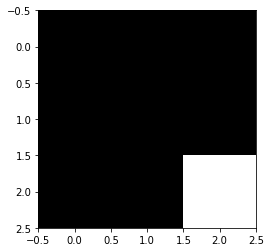

|-----------|
|   | O |   |
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
Exploiting
State-Values
[[0.005 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


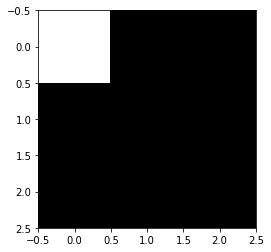

|-----------|
| X | O |   |
|-----------|
|   | O | X |
|-----------|
| X | X | O |
|-----------|
Exploiting
State-Values
[[ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


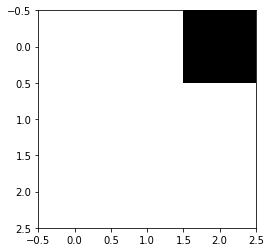

 42%|██████████████████████████████████                                               | 42/100 [00:24<00:50,  1.16it/s]

Exploring
|-----------|
| X | O |   |
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Game: 43
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 3.05175858e-49  0.00000000e+00  0.00000000e+00]
 [ 2.49526137e-05 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


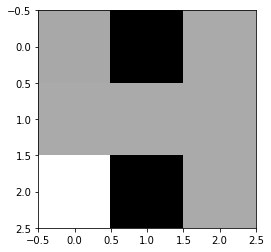

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 1.25000008e-09  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  6.25000039e-10]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


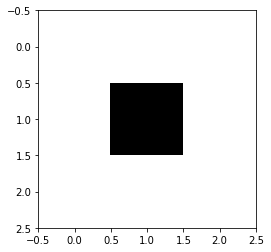

|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 1.25000008e-09 5.00000000e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


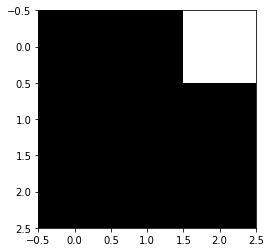

|-----------|
| O |   | X |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [-1.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


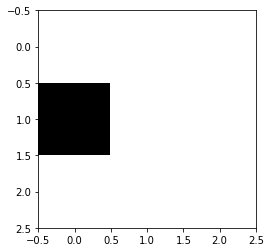

 43%|██████████████████████████████████▊                                              | 43/100 [00:24<00:48,  1.18it/s]

|-----------|
| O |   | X |
|-----------|
|   |   |   |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   |   | O |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
|   | X | O |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Game: 44
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 3.05175858e-49  0.00000000e+00  0.00000000e+00]
 [ 1.51136419e-06 -4.98750000e-05  4.65661520e-92]]
AxesImage(size=(3, 3))


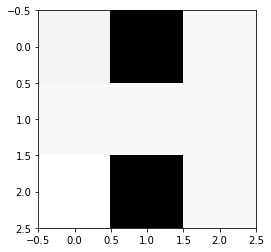

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[-4.98750000e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  6.25000039e-10]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


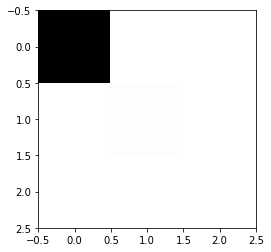

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  5.0125e-05]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


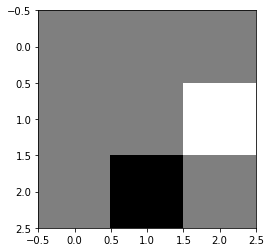

Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


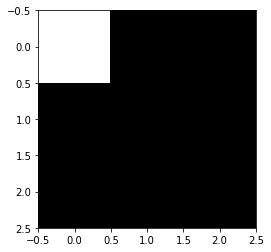

|-----------|
| O |   |   |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


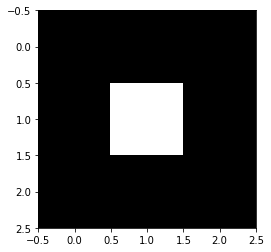

|-----------|
| O |   |   |
|-----------|
|   | X | O |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


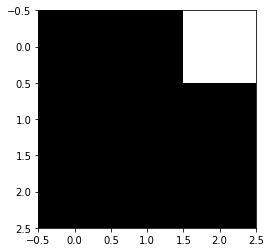

|-----------|
| O |   | O |
|-----------|
|   | X | O |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0. -1.  0.]]
AxesImage(size=(3, 3))


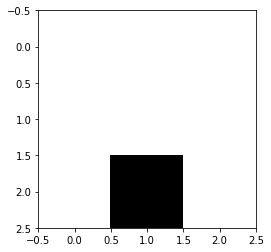

 44%|███████████████████████████████████▋                                             | 44/100 [00:26<00:54,  1.03it/s]

Exploring
|-----------|
| O |   | O |
|-----------|
|   | X | O |
|-----------|
| X |   | O |
|-----------|
Winner is: O
O has won the game



Game: 45
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X |   | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X |   | X |
|-----------|
| X | O | O 

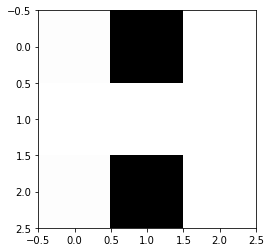

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 7.8125e-17 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


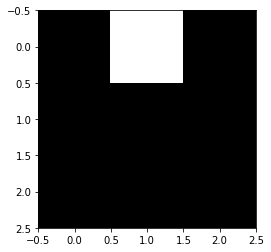

|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [7.8125e-17 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


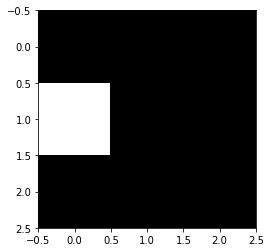

 46%|█████████████████████████████████████▎                                           | 46/100 [00:26<00:35,  1.53it/s]

|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | X | X |
|-----------|
| O |   |   |
|-----------|
Winner is: X
X has won the game



Game: 47
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00 -5.0000e-03]
 [ 2.5000e-03  5.0125e-05  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]]
AxesImage(size=(3, 3))


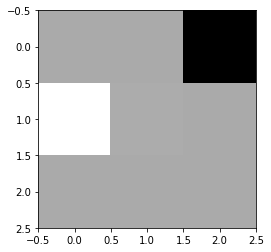

|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.2500000e-07 4.6566152e-90]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]
AxesImage(size=(3, 3))


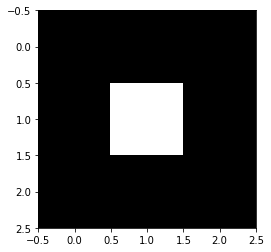

 47%|██████████████████████████████████████                                           | 47/100 [00:27<00:32,  1.62it/s]

|-----------|
|   |   |   |
|-----------|
| O | X |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O | X |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O | X |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O | X |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O | X | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
| X | O | X |
|-----------|
Draw
draw has won the game



Game: 48
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 1.51136419e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0

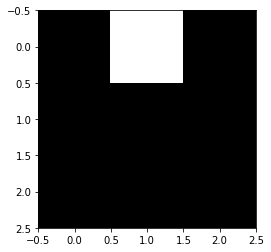

|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00 -4.9875e-05]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]]
AxesImage(size=(3, 3))


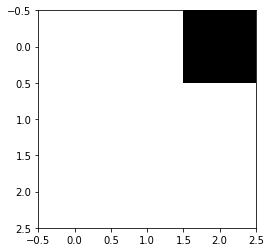

 48%|██████████████████████████████████████▉                                          | 48/100 [00:27<00:28,  1.80it/s]

|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O |   | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O | O | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X | O |   |
|-----------|
| O | O | X |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | O | X |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| O | O | X |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 49
Exploiting
State-Values
[[ 1.25000008e-011 -4.98750000e-005  0.00000000e+000]
 [ 3.05175858e-049  0.00000000e+000  1.51125000e-004]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


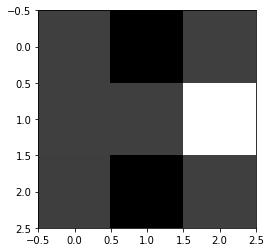

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.    -0.005  0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]
AxesImage(size=(3, 3))


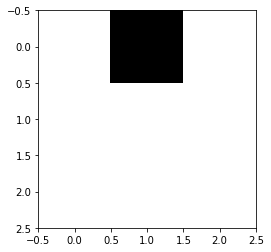

|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 1.50e-02 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


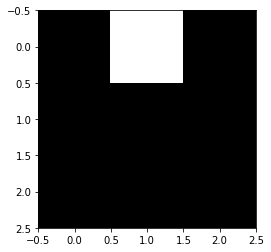

|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-1.  0.  0.]]
AxesImage(size=(3, 3))


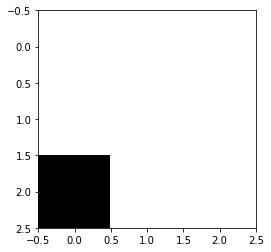

|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
| O | X | X |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


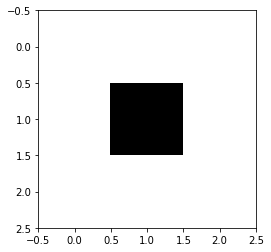

 49%|███████████████████████████████████████▋                                         | 49/100 [00:28<00:32,  1.56it/s]

Exploring
|-----------|
| O | O |   |
|-----------|
| O |   | X |
|-----------|
| O | X | X |
|-----------|
Winner is: O
O has won the game



Game: 50
Exploiting
State-Values
[[ 1.25000008e-011 -4.98750000e-005  0.00000000e+000]
 [ 3.05175858e-049  0.00000000e+000  2.49387500e-005]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


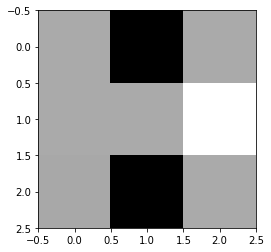

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00250151 -0.005       0.        ]
 [ 0.          0.          0.        ]
 [ 0.          0.          0.        ]]
AxesImage(size=(3, 3))


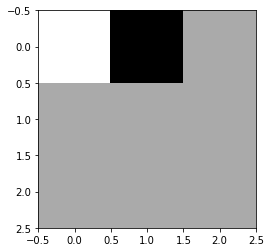

|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]]
AxesImage(size=(3, 3))


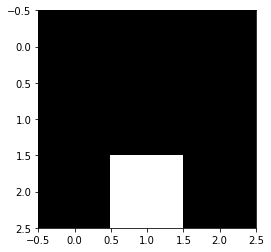

 50%|████████████████████████████████████████▌                                        | 50/100 [00:29<00:30,  1.63it/s]

|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
| X |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
| X |   | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
| X | O | X |
|-----------|
| O | X | X |
|-----------|
Winner is: O
O has won the game



Game: 51
Exploiting
State-Values
[[ 1.25000008e-011 -4.98750000e-005  0.00000000e+000]
 [ 3.05175858e-049  0.00000000e+000  2.44387624e-005]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


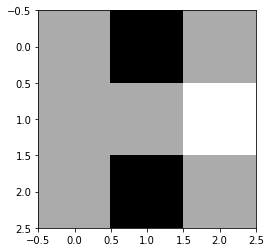

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 5.01262563e-07 -5.00000000e-03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


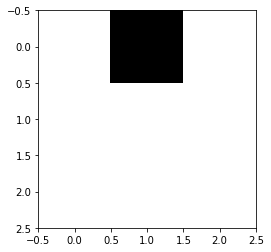

|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


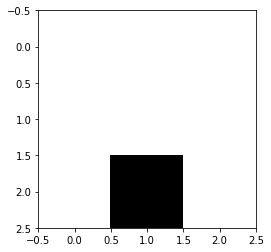

 51%|█████████████████████████████████████████▎                                       | 51/100 [00:29<00:28,  1.70it/s]

|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
|   | X | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| O | X | X |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| O | X | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O | O |   |
|-----------|
| O | X | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| O | X | X |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Game: 52
Exploiting
State-Values
[[ 1.25000008e-011 -4.98750000e-005  0.00000000e+000]
 [ 3.05175858e-049  0.00000000e+000  2.49381281e-007]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


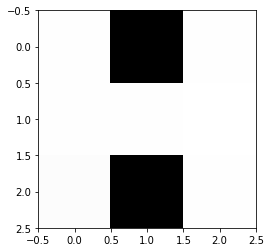

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.015 0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


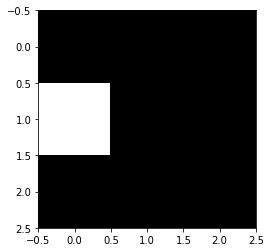

|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-1.  0.  0.]]
AxesImage(size=(3, 3))


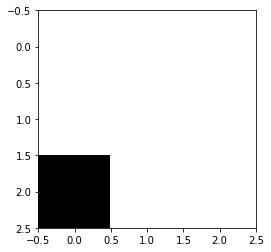

 52%|██████████████████████████████████████████                                       | 52/100 [00:30<00:27,  1.74it/s]

|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| O | O | O |
|-----------|
| X |   | X |
|-----------|
| O | X | X |
|-----------|
Winner is: O
O has won the game



Game: 53
Exploiting
State-Values
[[ 1.25000008e-011 -4.98750000e-005  0.00000000e+000]
 [ 3.05175858e-049  0.00000000e+000  5.01262563e-007]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


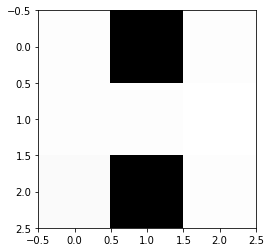

|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[1.25000008e-09 6.25075189e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


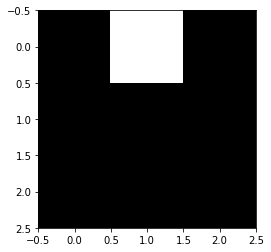

|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [5.0125e-05 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


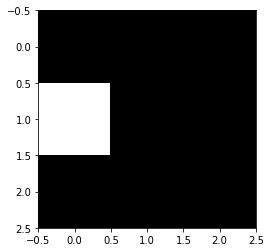

|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.          0.          0.50005013]
 [ 0.          0.          0.        ]
 [-1.          0.          0.        ]]
AxesImage(size=(3, 3))


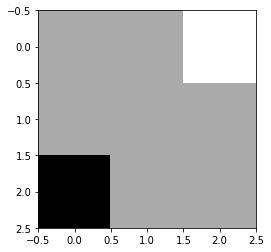

|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.005 0.   ]]
AxesImage(size=(3, 3))


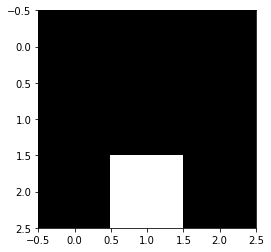

|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
|   | X |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.005 0.    0.   ]]
AxesImage(size=(3, 3))


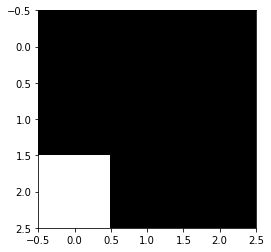

|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
| O | X |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -1.]]
AxesImage(size=(3, 3))


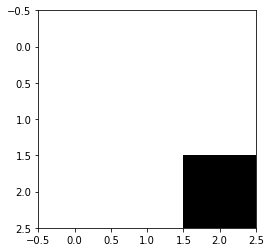

 53%|██████████████████████████████████████████▉                                      | 53/100 [00:31<00:36,  1.28it/s]

Exploring
|-----------|
|   | O | O |
|-----------|
| X |   | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X |   | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | O | X |
|-----------|
| O | X | O |
|-----------|
Winner is: O
O has won the game



Game: 54
Exploiting
State-Values
[[ 1.25000008e-011 -4.98750000e-005  0.00000000e+000]
 [ 3.05175858e-049  0.00000000e+000 -4.98737438e-009]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


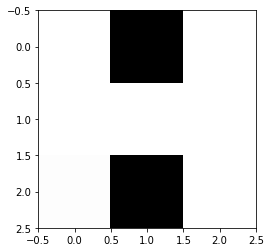

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 1.25000008e-09 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


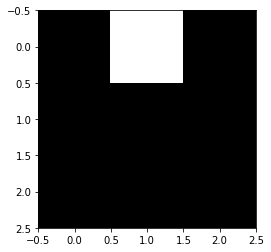

|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00 -4.98750000e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.25000008e-09]]
AxesImage(size=(3, 3))


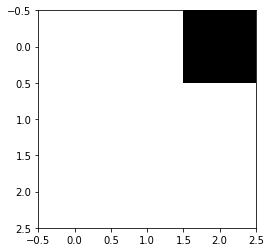

|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


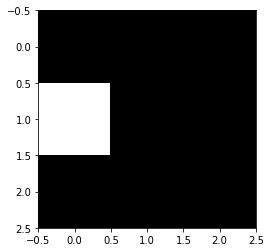

|-----------|
| X | O |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


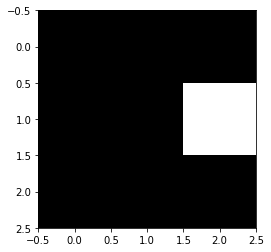

|-----------|
| X | O |   |
|-----------|
| O |   | X |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


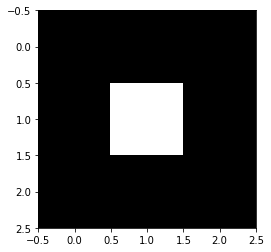

|-----------|
| X | O |   |
|-----------|
| O | O | X |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.005 0.   ]]
AxesImage(size=(3, 3))


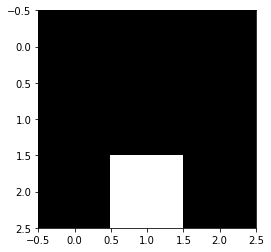

|-----------|
| X | O |   |
|-----------|
| O | O | X |
|-----------|
|   | X | X |
|-----------|
Exploiting
State-Values
[[ 0.  0. -1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


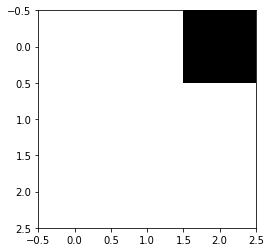

 54%|███████████████████████████████████████████▋                                     | 54/100 [00:33<00:47,  1.02s/it]

Exploring
|-----------|
| X | O |   |
|-----------|
| O | O | X |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 55
Exploiting
State-Values
[[ 1.51136534e-008 -4.98750000e-005  0.00000000e+000]
 [ 3.05175858e-049  0.00000000e+000 -4.98737438e-009]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


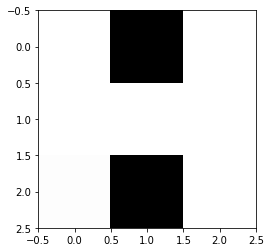

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


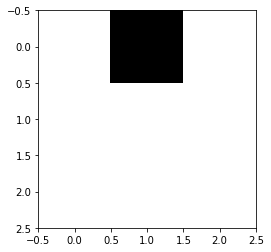

 55%|████████████████████████████████████████████▌                                    | 55/100 [00:33<00:37,  1.19it/s]

|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
|   | X |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | O | X |
|-----------|
| O | X |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| O | O | X |
|-----------|
| O | X | X |
|-----------|
Winner is: X
X has won the game



Game: 56
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-------

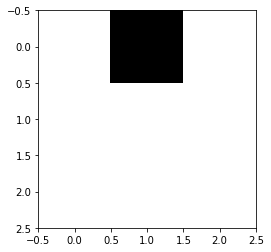

|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


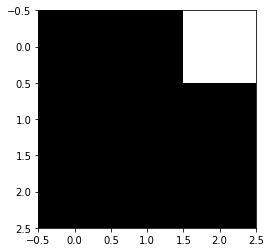

|-----------|
| X |   | X |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


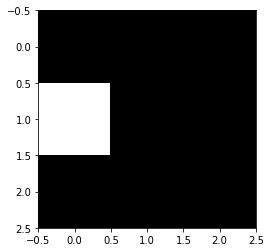

 56%|█████████████████████████████████████████████▎                                   | 56/100 [00:33<00:32,  1.35it/s]

|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O | O |
|-----------|
| O | X | X |
|-----------|
Winner is: O
O has won the game



Game: 57
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 3.05175858e-049  0.00000000e+000 -4.98737438e-009]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


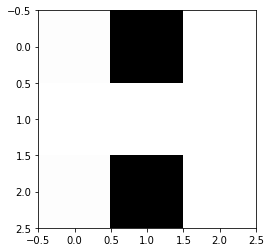

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -6.28160706e-24  6.26953125e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00 -1.39879456e-24]]
AxesImage(size=(3, 3))


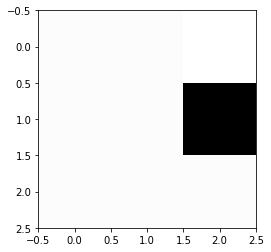

 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:34<00:26,  1.59it/s]

|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | X | X |
|-----------|
|   |   | O |
|-----------|
Winner is: X
X has won the game



Game: 58
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 7.50634453e-007  0.00000000e+000 -4.98737438e-009]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


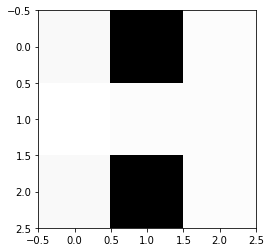

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -6.28160706e-24  5.01250000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00 -1.39879456e-24]]
AxesImage(size=(3, 3))


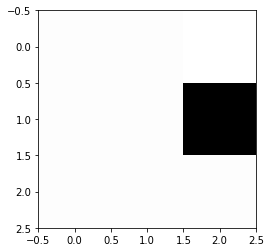

 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:34<00:23,  1.83it/s]

|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | X |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | X |   |
|-----------|
| X | O |   |
|-----------|
Winner is: X
X has won the game



Game: 59
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 2.50628141e-007  0.00000000e+000 -4.98737438e-009]
 [-4.98737562e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


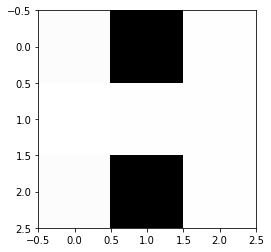

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -6.28160706e-24  5.01250000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00 -1.39879456e-24]]
AxesImage(size=(3, 3))


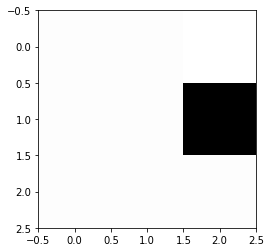

|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[5.01250000e-05 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.50625000e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.05175858e-47]]
AxesImage(size=(3, 3))


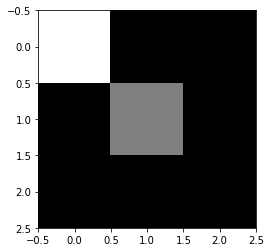

|-----------|
| X |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.005 0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


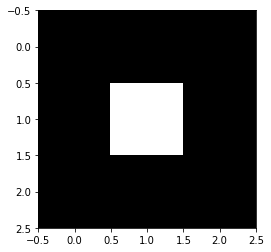

|-----------|
| X |   | O |
|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0. -1.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


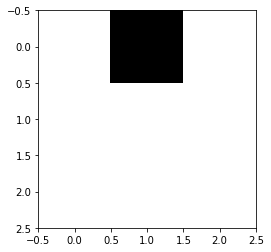

 59%|███████████████████████████████████████████████▊                                 | 59/100 [00:35<00:26,  1.52it/s]

Exploring
|-----------|
| X |   | O |
|-----------|
| X | X | X |
|-----------|
|   |   | O |
|-----------|
Winner is: X
X has won the game



Game: 60
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| O | O | O |
|-----------|
| X | O | X 

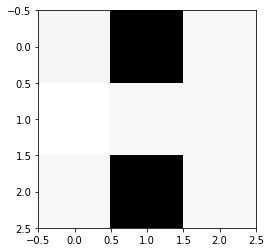

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  1.25313285e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98750000e-05  0.00000000e+00]]
AxesImage(size=(3, 3))


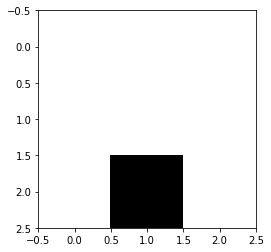

|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+000  0.00000000e+000  0.00000000e+000]
 [ 0.00000000e+000 -1.39879456e-022  1.94622514e-102]
 [ 0.00000000e+000  0.00000000e+000  0.00000000e+000]]
AxesImage(size=(3, 3))


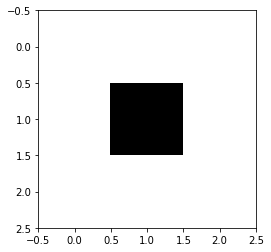

|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
AxesImage(size=(3, 3))


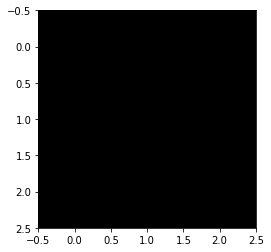

 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:36<00:21,  1.81it/s]

|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
| X |   | X |
|-----------|
| X |   | O |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| X |   | O |
|-----------|
| O |   | O |
|-----------|
Winner is: X
X has won the game



Game: 62
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 1.51136419e-006  0.00000000e+000 -4.98737438e-009]
 [ 1.25000008e-009 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


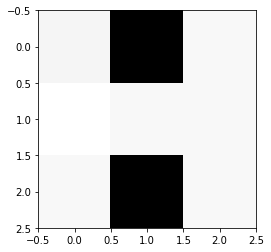

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| X |   | X |
|-----------|
| X | O | O |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X |   | X |
|-----------|
| X | O | O |
|-----------|
Exploiting
State-Values
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
AxesImage(size=(3, 3))


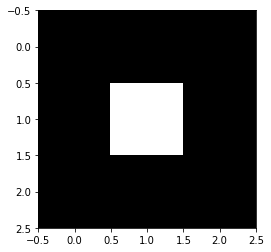

 62%|██████████████████████████████████████████████████▏                              | 62/100 [00:36<00:18,  2.04it/s]

|-----------|
| O | X | O |
|-----------|
| X | X | X |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Game: 63
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 2.49368719e-009  0.00000000e+000 -4.98737438e-009]
 [ 1.25000008e-009 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


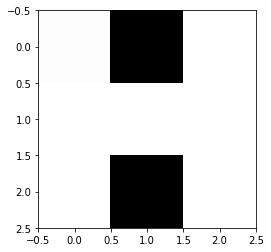

 63%|███████████████████████████████████████████████████                              | 63/100 [00:36<00:15,  2.46it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X |   |   |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X | O |   |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | O |   |
|-----------|
| X | X |   |
|-----------|
Winner is: X
X has won the game



Game: 64
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 5.00637563e-007  0.00000000e+000 -4.98737438e-009]
 [ 1.25000008e-009 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


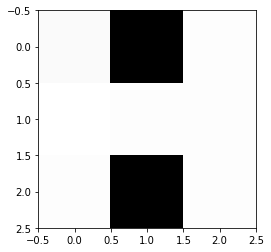

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  7.50625000e-05 -4.98750000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00 -1.22506125e-03  2.45012500e-03]]
AxesImage(size=(3, 3))


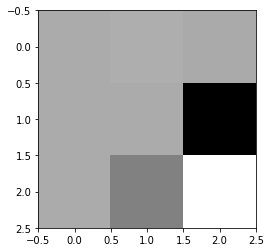

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.00000e+00  0.00000e+00  1.51125e-04]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00 -4.98750e-05  0.00000e+00]]
AxesImage(size=(3, 3))


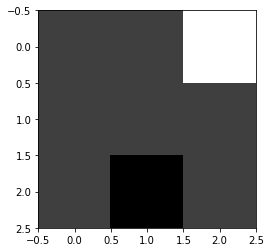

|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.39879456e-22 -5.00000000e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


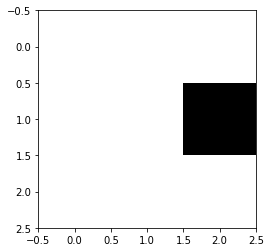

 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:37<00:17,  2.06it/s]

Exploring
|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | O |   |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | O | X |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| X | O | X |
|-----------|
|   | X | O |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
| X | X | O |
|-----------|
Draw
draw has won the game



Game: 65
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 5.00637563e-007  0.00000000e+000 -4.98737438e-009]
 [ 1.25000008e-009 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


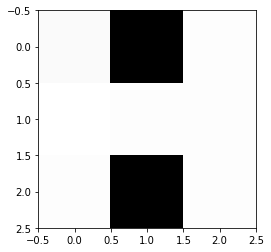

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  7.50625000e-05 -4.98750000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00 -1.22506125e-03  2.45012500e-03]]
AxesImage(size=(3, 3))


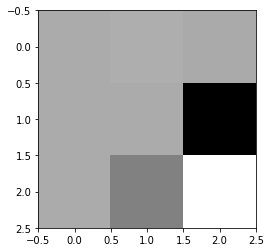

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploiting
State-Values
[[ 0.00000e+00  0.00000e+00  1.51125e-04]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00 -4.98750e-05  0.00000e+00]]
AxesImage(size=(3, 3))


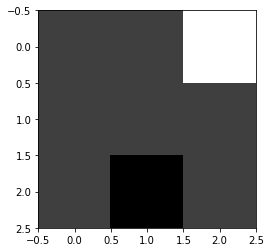

 65%|████████████████████████████████████████████████████▋                            | 65/100 [00:38<00:17,  2.00it/s]

|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   |   |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | X |   |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X | X |   |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | X |   |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | X |   |
|-----------|
| O | O | O |
|-----------|
Winner is: O
O has won the game



Game: 66
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 2.49378109e-007  0.00000000e+000 -4.98737438e-009]
 [ 1.25000008e-009 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


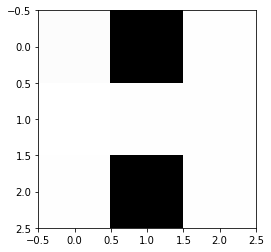

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  7.50625000e-05 -4.98750000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00 -1.22506125e-03 -2.50631281e-07]]
AxesImage(size=(3, 3))


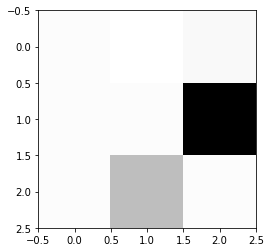

|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+000 0.00000000e+000 1.08420326e-177]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [5.01250000e-005 0.00000000e+000 0.00000000e+000]]
AxesImage(size=(3, 3))


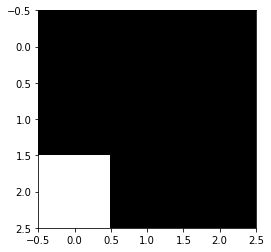

|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


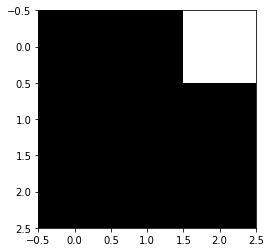

|-----------|
|   | O | O |
|-----------|
| X |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X |   |   |
|-----------|
| X | X |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  0.]]
AxesImage(size=(3, 3))


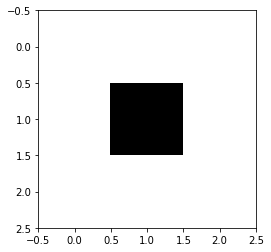

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:39<00:22,  1.53it/s]

|-----------|
|   | O | O |
|-----------|
| X |   | O |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X |   | O |
|-----------|
| X | X |   |
|-----------|
Winner is: X
X has won the game



Game: 67
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 1.51073919e-006  0.00000000e+000 -4.98737438e-009]
 [ 1.25000008e-009 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


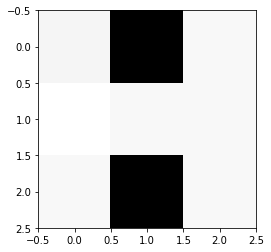

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


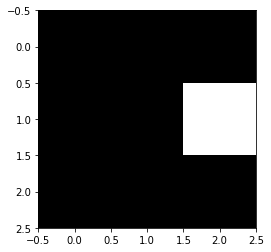

|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
|   | O |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]]
AxesImage(size=(3, 3))


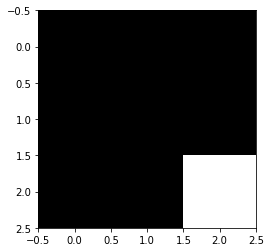

|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
Exploiting
State-Values
[[0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


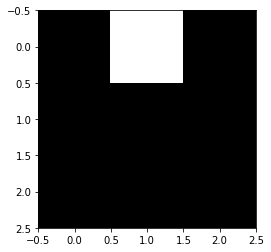

|-----------|
|   | X |   |
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


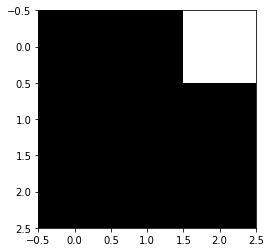

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:40<00:23,  1.39it/s]

|-----------|
|   | X | O |
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| X |   | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| X | O | X |
|-----------|
|   | O | O |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| X | O | X |
|-----------|
| X | O | O |
|-----------|
Winner is: X
X has won the game



Game: 68
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 1.50726111e-008  0.00000000e+000 -4.98737438e-009]
 [ 1.25000008e-009 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


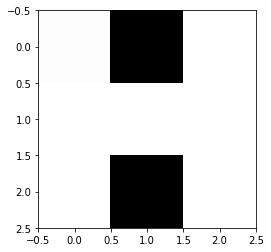

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -2.49375000e-05 -4.98750000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 0.00000000e+00 -3.73421922e-07 -2.50631281e-07]]
AxesImage(size=(3, 3))


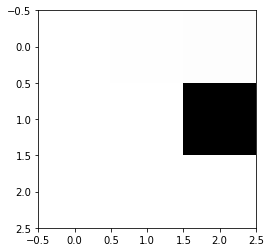

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | X |   |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X | X | O |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X | X | O |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 7.81250098e-21 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


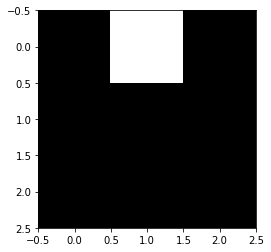

|-----------|
| X | O | O |
|-----------|
| X | X | O |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.81250098e-21 0.00000000e+00]]
AxesImage(size=(3, 3))


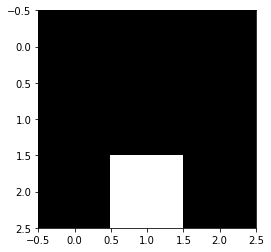

 68%|███████████████████████████████████████████████████████                          | 68/100 [00:40<00:23,  1.38it/s]

|-----------|
| X | O | O |
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
Draw
draw has won the game



Game: 69
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 1.50726111e-008  0.00000000e+000 -4.98737438e-009]
 [ 1.25000008e-009 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


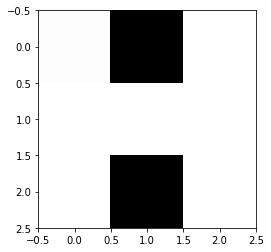

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:40<00:17,  1.76it/s]

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | X |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | X |   |
|-----------|
|   |   | O |
|-----------|
Exploring
|-----------|
|   | O |   |
|-----------|
| X | X |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   | O | O |
|-----------|
| X | X |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
| X | O | O |
|-----------|
| X | X |   |
|-----------|
| X |   | O |
|-----------|
Winner is: X
X has won the game



Game: 70
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 1.36943307e-087  0.00000000e+000 -4.98737438e-009]
 [ 1.25000008e-009 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


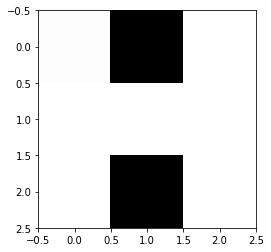

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[-4.98750000e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07  2.64488642e-05]
 [ 0.00000000e+00  2.50618781e-07  0.00000000e+00]]
AxesImage(size=(3, 3))


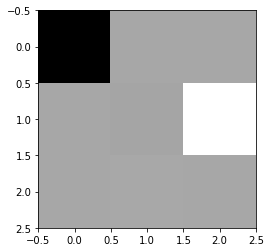

|-----------|
|   |   |   |
|-----------|
|   |   | O |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00 -4.9875e-05]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


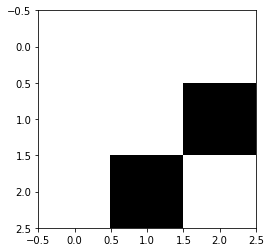

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:41<00:17,  1.67it/s]

|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X |   | O |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X |   | O |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| X | O | O |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X | O | O |
|-----------|
| X | O | X |
|-----------|
Winner is: O
O has won the game



Game: 71
Exploiting
State-Values
[[-4.98743781e-007 -4.98750000e-005  0.00000000e+000]
 [ 1.36943307e-087  0.00000000e+000 -4.98737438e-009]
 [ 5.01262563e-007 -4.98750000e-005  4.65661522e-108]]
AxesImage(size=(3, 3))


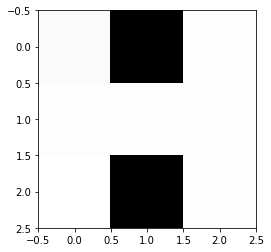

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[-4.98750000e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98737562e-07 -1.24059391e-07]
 [ 0.00000000e+00  2.50618781e-07  0.00000000e+00]]
AxesImage(size=(3, 3))


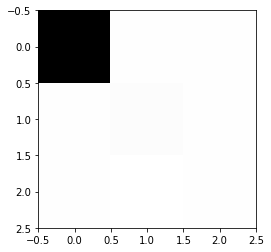

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 1.25e-07]]
AxesImage(size=(3, 3))


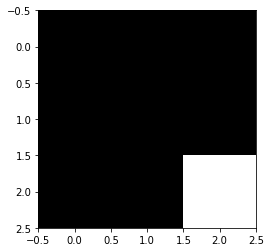

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


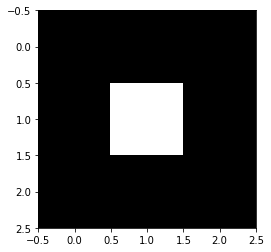

|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.005]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


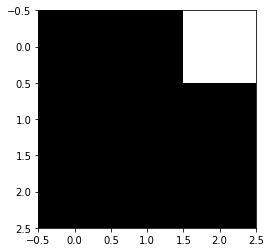

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [00:42<00:20,  1.43it/s]

|-----------|
|   |   | X |
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
|   | O | O |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
|   | O | O |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
| O | O | O |
|-----------|
| X | O | X |
|-----------|
Winner is: O
O has won the game



Game: 72
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O |   |   |
|-----------|
|   | O | X |
|-------

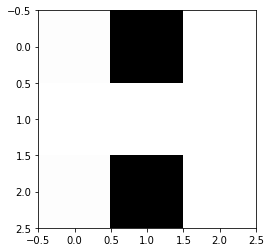

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  5.02503156e-05 -4.98750000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 2.50000000e-03 -3.73421922e-07 -2.50631281e-07]]
AxesImage(size=(3, 3))


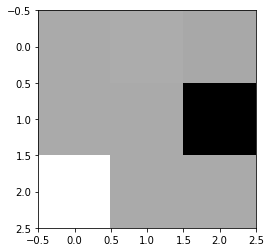

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
| O |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.36943307e-85 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


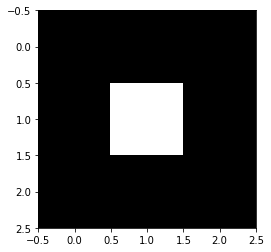

 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [00:43<00:14,  1.89it/s]

|-----------|
|   |   |   |
|-----------|
| X | X |   |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | X |   |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | X | X |
|-----------|
| O | O |   |
|-----------|
Winner is: X
X has won the game



Game: 74
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
|   | X |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
| X |   | O |
|-------

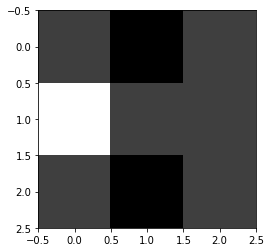

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07  5.02503156e-05 -4.98750000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [-4.99981329e-03 -3.73421922e-07 -2.50631281e-07]]
AxesImage(size=(3, 3))


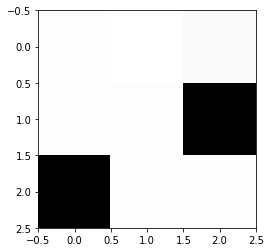

|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+000  0.00000000e+000  1.08420326e-177]
 [ 0.00000000e+000 -2.54375000e-005  0.00000000e+000]
 [ 1.51125000e-004  0.00000000e+000  0.00000000e+000]]
AxesImage(size=(3, 3))


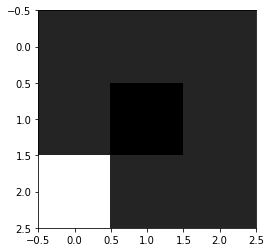

|-----------|
|   | O |   |
|-----------|
| X |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.     0.    -0.005]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]
AxesImage(size=(3, 3))


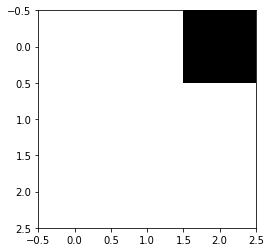

 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [00:43<00:11,  2.16it/s]

Exploring
|-----------|
|   | O | X |
|-----------|
| X |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| X | X |   |
|-----------|
| X |   | O |
|-----------|
Winner is: X
X has won the game



Game: 76
Exploiting
State-Values
[[-4.98743781e-07 -4.98750000e-05  0.00000000e+00]
 [ 5.00637563e-07  0.00000000e+00 -4.98737438e-09]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


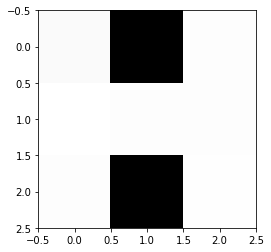

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -7.50001578e-05 -4.98750000e-05]
 [ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [-4.99981329e-03 -3.73421922e-07 -2.50631281e-07]]
AxesImage(size=(3, 3))


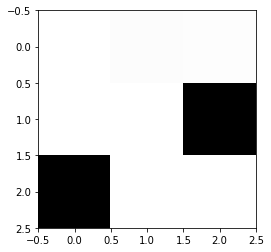

 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:44<00:10,  2.32it/s]

Exploring
|-----------|
| X |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X |   | O |
|-----------|
| X |   |   |
|-----------|
Winner is: X
X has won the game



Game: 77
Exploiting
State-Values
[[-4.98743781e-07 -4.98750000e-05  0.00000000e+00]
 [ 5.03743719e-05  0.00000000e+00 -4.98737438e-09]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


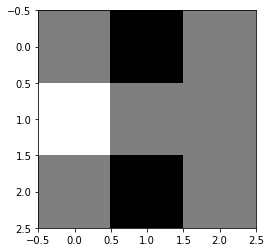

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [-4.9875e-05  0.0000e+00 -4.9875e-05]]
AxesImage(size=(3, 3))


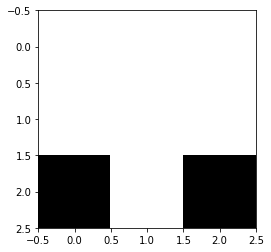

 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [00:44<00:09,  2.38it/s]

|-----------|
| O | X |   |
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X | O | O |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
Draw
draw has won the game



Game: 78
Exploiting
State-Values
[[-4.98743781e-07 -4.98750000e-05  0.00000000e+00]
 [ 5.03743719e-05  0.00000000e+00 -4.98737438e-09]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


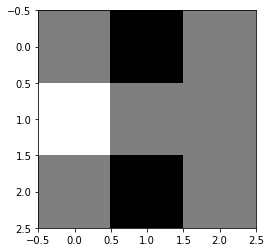

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -7.50001578e-05 -4.98750000e-05]
 [-2.50000000e-03  0.00000000e+00 -5.00000000e-03]
 [-4.99981329e-03 -3.73421922e-07 -2.50631281e-07]]
AxesImage(size=(3, 3))


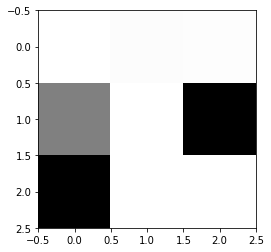

 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:45<00:08,  2.45it/s]

|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X | O | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X | O | X |
|-----------|
| O | O | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | X |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game



Game: 79
Exploiting
State-Values
[[-4.98743781e-07 -4.98750000e-05  0.00000000e+00]
 [ 2.49375000e-05  0.000000

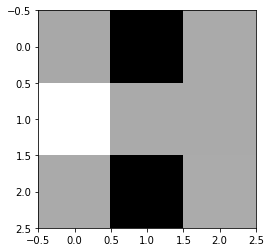

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000000e+00 1.1682232e-87 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]
AxesImage(size=(3, 3))


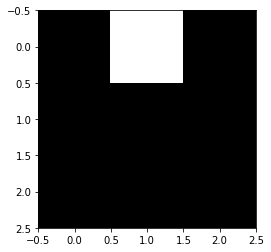

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  4.93133456e-36  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00 -4.98750000e-05]]
AxesImage(size=(3, 3))


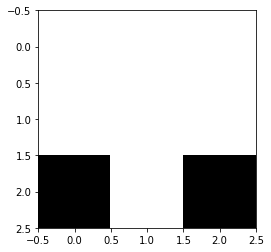

|-----------|
| O | X |   |
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.1682232e-85]]
AxesImage(size=(3, 3))


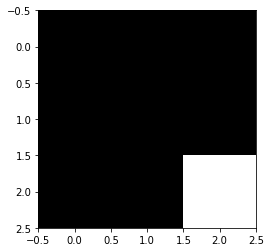

|-----------|
| O | X |   |
|-----------|
| X | O |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.93133456e-34]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


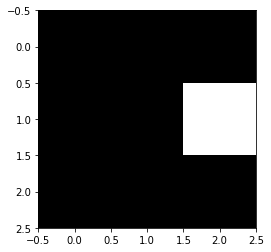

|-----------|
| O | X |   |
|-----------|
| X | O | O |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 4.83368017e-42]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


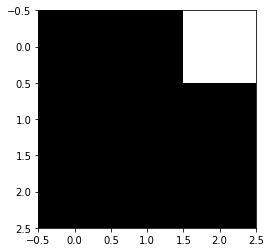

|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.14048868e-16 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


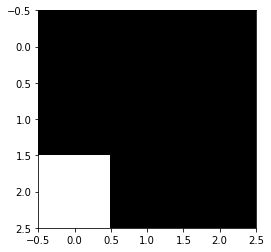

|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| O |   | X |
|-----------|
Exploiting
State-Values
[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.1092379e-20 0.0000000e+00]]
AxesImage(size=(3, 3))


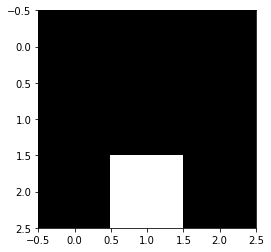

 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [00:46<00:15,  1.40it/s]

|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
Draw
draw has won the game



Game: 80
Exploiting
State-Values
[[-4.98743781e-07 -4.98750000e-05  0.00000000e+00]
 [ 2.49375000e-05  0.00000000e+00 -4.98737438e-09]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


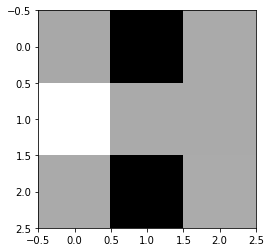

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-1.25309391e-07 -7.50001578e-05 -4.98750000e-05]
 [-2.50000000e-03  2.50618781e-07 -5.00000000e-03]
 [-4.99981329e-03 -3.73421922e-07 -2.50631281e-07]]
AxesImage(size=(3, 3))


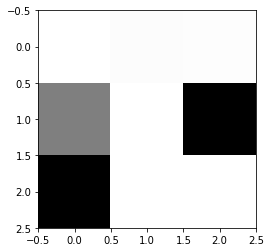

|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 7.8125e-17]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


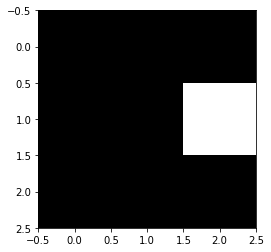

|-----------|
|   |   |   |
|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[1.25e-07 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


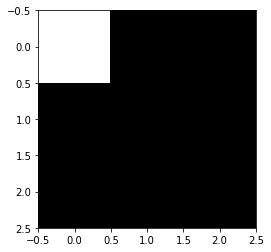

 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [00:47<00:14,  1.35it/s]

|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| X | O | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X | O | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X | O | X |
|-----------|
| O | O | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | X |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game



Game: 81
Exploiting
State-Values
[[-4.98743781e-07 -4.98750000e-05  0.00000000e+00]
 [ 2.49375000e-05  0.00000000e+00 -4.98737438e-09]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


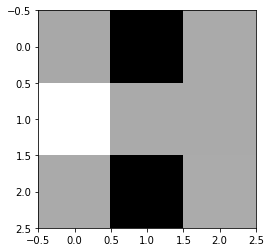

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 3.42252438e-07 -7.50001578e-05 -4.98750000e-05]
 [-2.50000000e-03 -6.84504890e-07 -5.00000000e-03]
 [-4.99981329e-03 -3.73421922e-07 -2.50631281e-07]]
AxesImage(size=(3, 3))


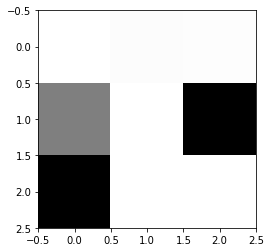

|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000000e+00 7.5063141e-17 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]
AxesImage(size=(3, 3))


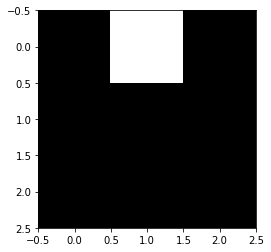

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.84504654e-13  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00 -4.98750000e-05]]
AxesImage(size=(3, 3))


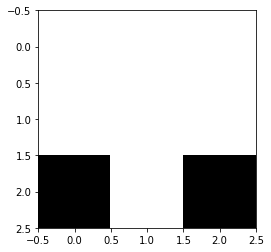

 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [00:48<00:14,  1.34it/s]

|-----------|
| O | X |   |
|-----------|
| X |   | O |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
| X |   | O |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X |   | O |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | X | O |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | X | O |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | X | O |
|-----------|
| X | O | X |
|-----------|
Draw
draw has won the game



Game: 82
Exploiting
State-Values
[[-4.98743781e-07 -4.98750000e-05  0.00000000e+00]
 [ 2.49375000e-05  0.00000000e+00 -4.98737438e-09]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


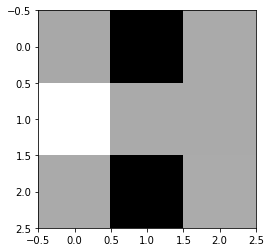

|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 3.42252438e-07 -7.50001578e-05 -4.98750000e-05]
 [-2.50000000e-03 -6.84504890e-07 -5.00000000e-03]
 [-4.99981329e-03 -3.73421922e-07 -2.50631281e-07]]
AxesImage(size=(3, 3))


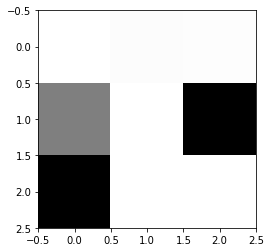

|-----------|
| O |   |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000000e+00 7.5063141e-17 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00]]
AxesImage(size=(3, 3))


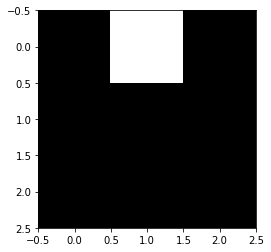

|-----------|
| O | X |   |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.84504654e-13  0.00000000e+00]
 [-4.98750000e-05  0.00000000e+00 -4.98750000e-05]]
AxesImage(size=(3, 3))


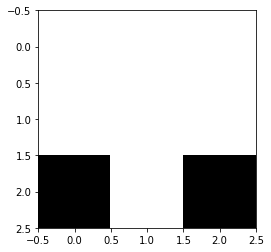

 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [00:48<00:13,  1.34it/s]

|-----------|
| O | X | O |
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | X |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | X |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | X |
|-----------|
| X | O | X |
|-----------|
Draw
draw has won the game



Game: 83
Exploring
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 4.65661520e-90  1.51125000e-04  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


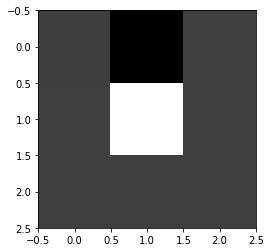

|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.     0.     0.   ]
 [ 0.     0.    -0.005]
 [ 0.     0.     0.   ]]
AxesImage(size=(3, 3))


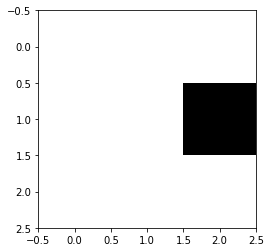

 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [00:49<00:10,  1.56it/s]

|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   | O | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   | O | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   | O | X |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
|   | O | X |
|-----------|
| O | X | X |
|-----------|
Winner is: O
O has won the game



Game: 84
Exploiting
State-Values
[[-4.98743781e-07  2.54090797e-05  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00 -4.98737438e-09]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


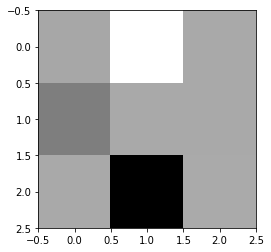

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 4.65661520e-90  2.50618781e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


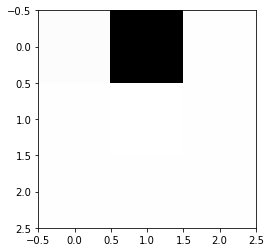

|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.          0.          0.        ]
 [ 0.          0.         -0.005     ]
 [ 0.          0.          0.00255013]]
AxesImage(size=(3, 3))


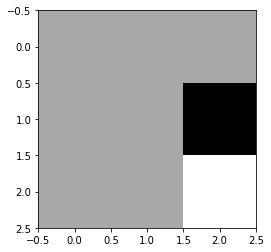

 84%|████████████████████████████████████████████████████████████████████             | 84/100 [00:49<00:09,  1.61it/s]

|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | O |   |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | O | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
|   | O | X |
|-----------|
| O | O | X |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
|   | O | X |
|-----------|
| O | O | X |
|-----------|
Winner is: X
X has won the game



Game: 85
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[1.25000008e-09 6.25000752e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


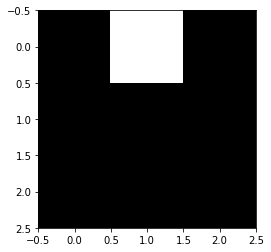

|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.98737562e-07  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


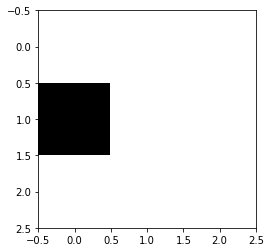

 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [00:50<00:08,  1.83it/s]

|-----------|
|   | O | X |
|-----------|
|   |   | X |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   |   | X |
|-----------|
| O |   |   |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   |   | X |
|-----------|
| O |   | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   |   | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
|   | O | X |
|-----------|
| O | X | O |
|-----------|
Exploring
|-----------|
| X | O | X |
|-----------|
| X | O | X |
|-----------|
| O | X | O |
|-----------|
Draw
draw has won the game



Game: 86
Exploiting
State-Values
[[-4.98743781e-07  2.54090797e-05  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00 -4.98737438e-09]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


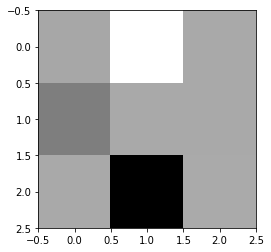

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 4.65661520e-90 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


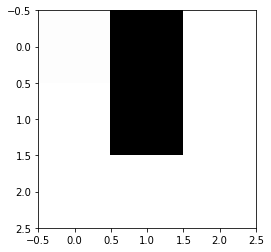

|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
AxesImage(size=(3, 3))


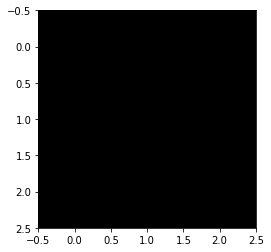

 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [00:51<00:08,  1.64it/s]

|-----------|
|   | X | X |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O | O |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O | O |   |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| O | O | O |
|-----------|
|   | X | X |
|-----------|
Winner is: O
O has won the game



Game: 87
Exploiting
State-Values
[[-4.98743781e-07  5.01262563e-07  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


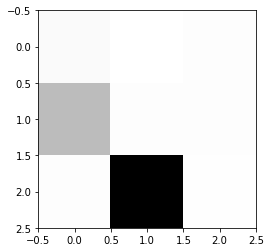

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.51136419e-06]]
AxesImage(size=(3, 3))


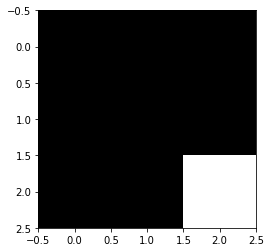

|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00 -4.9875e-05  0.0000e+00]]
AxesImage(size=(3, 3))


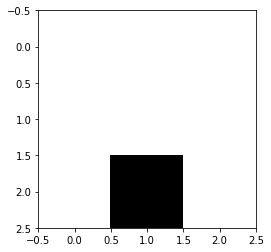

 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [00:51<00:08,  1.62it/s]

Exploring
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O | X |   |
|-----------|
|   | O |   |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
|   | X | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
| X | O | O |
|-----------|
| O | X | X |
|-----------|
Draw
draw has won the game



Game: 88
Exploiting
State-Values
[[-4.98743781e-07  5.01262563e-07  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


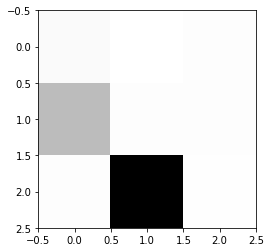

|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[-4.98737562e-07 -4.98750000e-05  0.00000000e+00]
 [ 2.50618781e-07 -4.98750000e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


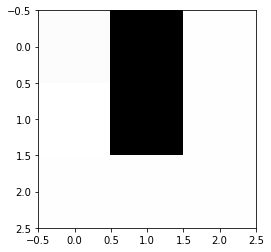

|-----------|
|   | X |   |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 5.0125e-05]
 [0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


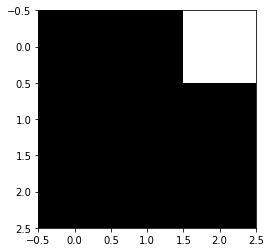

 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:52<00:07,  1.63it/s]

|-----------|
|   | X | X |
|-----------|
| O |   |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
|   | X | X |
|-----------|
| O | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X | X | X |
|-----------|
| O | O |   |
|-----------|
|   |   |   |
|-----------|
Winner is: X
X has won the game



Game: 89
Exploiting
State-Values
[[-4.98743781e-07 -1.24685945e-07  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


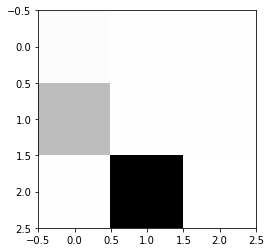

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 4.65661522e-106 4.65661520e-090]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]]
AxesImage(size=(3, 3))


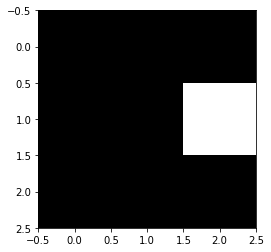

|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 3.11332971e-51]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


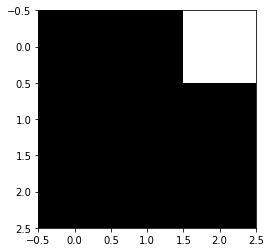

 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [00:52<00:06,  1.66it/s]

|-----------|
|   |   | O |
|-----------|
| O |   | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| O | X | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| O | X | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| O | X | X |
|-----------|
| O |   | X |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| O | X | X |
|-----------|
| O | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | X | X |
|-----------|
| O | O | X |
|-----------|
Draw
draw has won the game



Game: 90
Exploiting
State-Values
[[-4.98743781e-07 -1.24685945e-07  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 1.25000008e-09 -4.98750000e-05  2.49371890e-07]]
AxesImage(size=(3, 3))


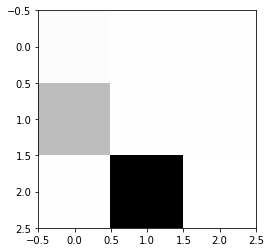

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 3.05175858e-47  5.01250000e-05  0.00000000e+00]
 [ 0.00000000e+00  3.05084626e-37  0.00000000e+00]]
AxesImage(size=(3, 3))


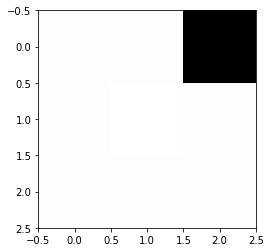

|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.005 0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


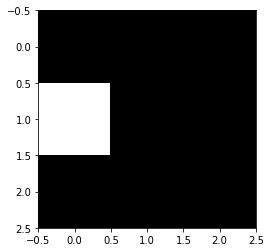

|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.    0.005 0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


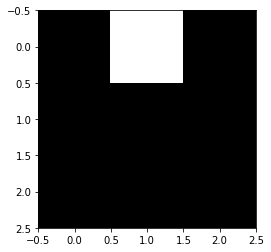

|-----------|
|   | O |   |
|-----------|
| X | O |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-1.  0.  0.]]
AxesImage(size=(3, 3))


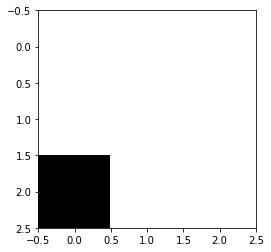

 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [00:53<00:07,  1.40it/s]

Exploring
|-----------|
|   | O |   |
|-----------|
| X | O |   |
|-----------|
|   | O | X |
|-----------|
Winner is: O
O has won the game



Game: 91
Exploiting
State-Values
[[-4.98743781e-07 -1.24685945e-07  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 1.25000008e-09 -4.98750000e-05  2.73075598e-30]]
AxesImage(size=(3, 3))


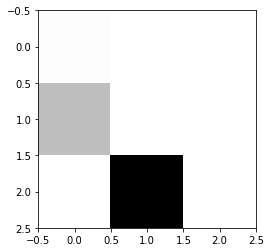

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


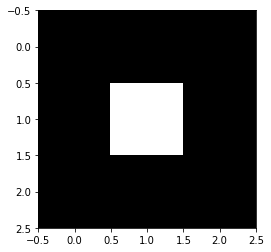

|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.005 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


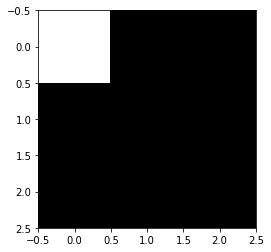

|-----------|
| O |   | O |
|-----------|
|   | X |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.005]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


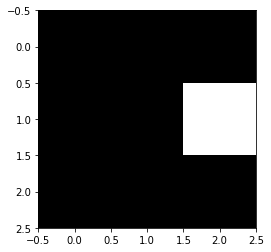

|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -1.]]
AxesImage(size=(3, 3))


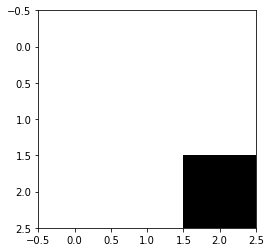

 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [00:54<00:07,  1.23it/s]

Exploring
|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
| X | X |   |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
| O |   | O |
|-----------|
| X | X | X |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Game: 92
Exploiting
State-Values
[[-4.98743781e-07 -1.24685945e-07  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 5.01262688e-09 -4.98750000e-05  2.73075598e-30]]
AxesImage(size=(3, 3))


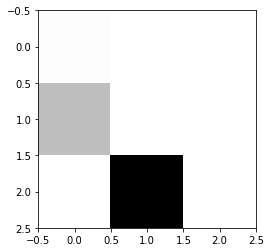

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[-4.98750000e-05  0.00000000e+00  8.68794108e-05]
 [ 0.00000000e+00 -4.98737562e-07 -1.24059391e-07]
 [ 0.00000000e+00  1.50726039e-06  0.00000000e+00]]
AxesImage(size=(3, 3))


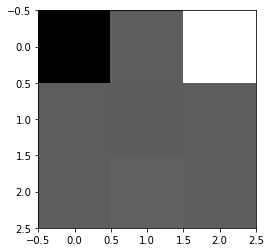

|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.01262563e-07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


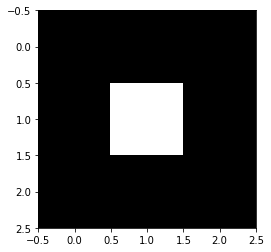

|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.00617513 0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]
AxesImage(size=(3, 3))


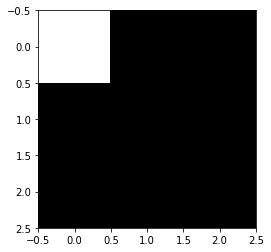

|-----------|
| O |   | O |
|-----------|
|   | X |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.0000e+00 0.0000e+00 0.0000e+00]
 [0.0000e+00 0.0000e+00 5.0125e-05]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
AxesImage(size=(3, 3))


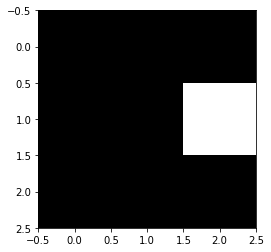

|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[ 0.     0.     0.495]
 [ 0.     0.     0.   ]
 [ 0.     0.    -1.   ]]
AxesImage(size=(3, 3))


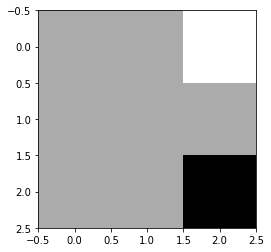

Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.005 0.   ]]
AxesImage(size=(3, 3))


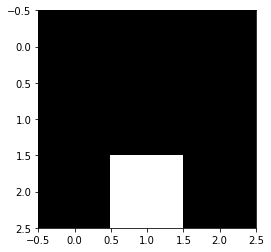

|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
| X | X |   |
|-----------|
Exploiting
State-Values
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0. -1.]]
AxesImage(size=(3, 3))


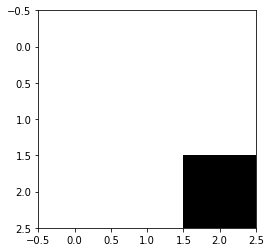

 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [00:56<00:08,  1.05s/it]

Exploring
|-----------|
| O |   | O |
|-----------|
|   | X | X |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 93
Exploiting
State-Values
[[-4.98743781e-07 -1.24685945e-07  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 1.51136534e-08 -4.98750000e-05  2.73075598e-30]]
AxesImage(size=(3, 3))


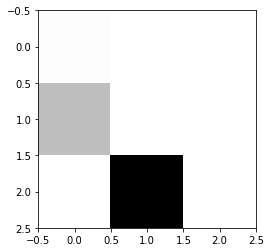

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[-4.98750000e-05  0.00000000e+00  2.44387624e-05]
 [ 0.00000000e+00 -4.98737562e-07 -1.24059391e-07]
 [ 0.00000000e+00  1.50726039e-06  0.00000000e+00]]
AxesImage(size=(3, 3))


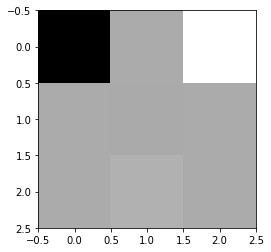

 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [00:56<00:05,  1.19it/s]

|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
|   | O |   |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X | O |   |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| X | O | O |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| X | O | O |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | O |
|-----------|
| X |   | X |
|-----------|
Exploring
|-----------|
| O | X | O |
|-----------|
| X | O | O |
|-----------|
| X | X | X |
|-----------|
Winner is: X
X has won the game



Game: 94
Exploiting
State-Values
[[-4.98743781e-07 -1.24685945e-07  0.00000000e+00]
 [-1.27045399e-05  0.000000

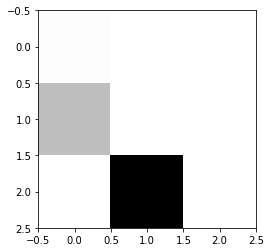

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[-4.98750000e-05  0.00000000e+00  2.50618781e-07]
 [ 0.00000000e+00 -4.98737562e-07 -1.24059391e-07]
 [ 0.00000000e+00  1.50726039e-06  0.00000000e+00]]
AxesImage(size=(3, 3))


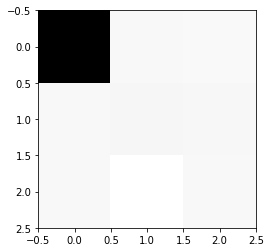

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00 -4.9875e-05]]
AxesImage(size=(3, 3))


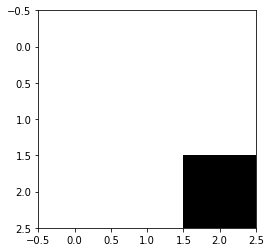

 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [00:57<00:04,  1.32it/s]

Exploring
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X | O |   |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   |   | X |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   | O | X |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Winner is: O
O has won the game



Game: 95
Exploring
|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]
 [ 0.00000000e+00  5.01262563e-07  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


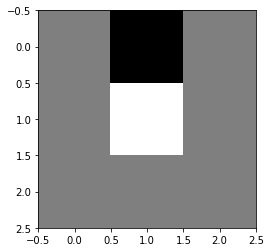

 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [00:57<00:02,  1.71it/s]

|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X | O |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X | O | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   | O |
|-----------|
| X | O | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| X | O | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| X | O | X |
|-----------|
|   | O | O |
|-----------|
Winner is: O
O has won the game



Game: 96
Exploiting
State-Values
[[ 6.85353250e-06 -1.24685945e-07  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 2.56881532e-05 -4.98750000e-05  2.73075598e-30]]
AxesImage(size=(3, 3))


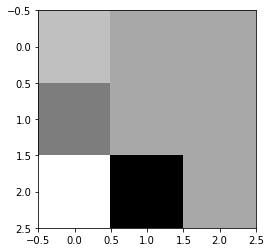

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[-4.98750000e-05  0.00000000e+00  2.50618781e-07]
 [ 0.00000000e+00 -4.98737562e-07 -1.24059391e-07]
 [ 0.00000000e+00  2.50618781e-07  0.00000000e+00]]
AxesImage(size=(3, 3))


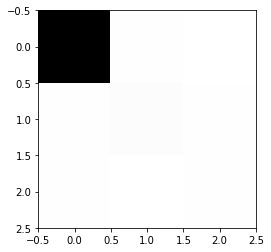

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  7.50625e-05 -4.98750e-05]]
AxesImage(size=(3, 3))


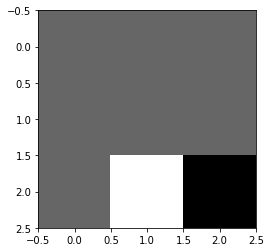

Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]]
AxesImage(size=(3, 3))


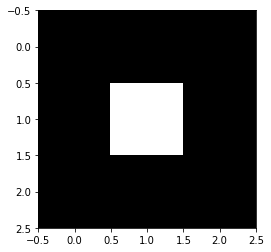

|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X | O |   |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.005]]
AxesImage(size=(3, 3))


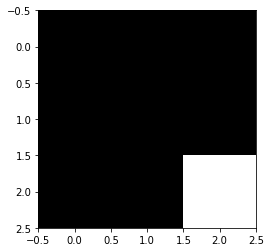

|-----------|
|   |   |   |
|-----------|
|   | O |   |
|-----------|
| X | O | X |
|-----------|
Exploiting
State-Values
[[0.    0.    0.   ]
 [0.005 0.    0.   ]
 [0.    0.    0.   ]]
AxesImage(size=(3, 3))


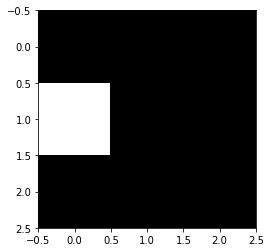

 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [00:58<00:02,  1.34it/s]

|-----------|
|   |   |   |
|-----------|
| O | O |   |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| O |   |   |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Exploring
|-----------|
| O |   | X |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Winner is: X
X has won the game



Game: 97
Exploiting
State-Values
[[ 6.85353250e-06 -1.24685945e-07  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 2.58366249e-05 -4.98750000e-05  2.73075598e-30]]
AxesImage(size=(3, 3))


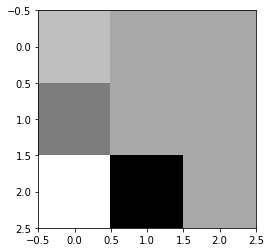

|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[-4.98750000e-05  0.00000000e+00  2.50618781e-07]
 [ 0.00000000e+00 -4.98737562e-07 -1.24059391e-07]
 [ 0.00000000e+00 -2.49368781e-07  0.00000000e+00]]
AxesImage(size=(3, 3))


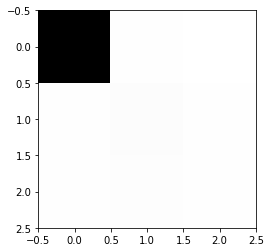

|-----------|
|   |   | O |
|-----------|
|   |   |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.51136419e-06 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.25000008e-09]]
AxesImage(size=(3, 3))


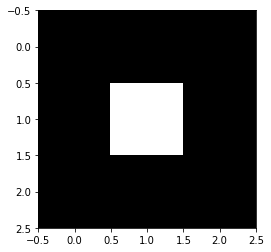

|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
| X |   |   |
|-----------|
Exploiting
State-Values
[[-4.9875e-05  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00]]
AxesImage(size=(3, 3))


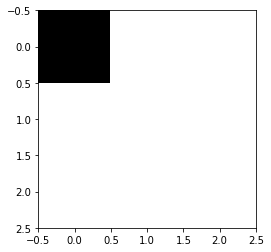

 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:59<00:02,  1.35it/s]

|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
| X |   | O |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
|   | X |   |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
|   |   | O |
|-----------|
| O | X |   |
|-----------|
| X | X | O |
|-----------|
Exploring
|-----------|
|   | X | O |
|-----------|
| O | X |   |
|-----------|
| X | X | O |
|-----------|
Winner is: X
X has won the game



Game: 98
Exploring
|-----------|
|   | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 2.4937500e-05 -4.9875000e-05  0.0000000e+00]
 [-4.9750625e-03 -4.9875000e-05  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]]
AxesImage(size=(3, 3))


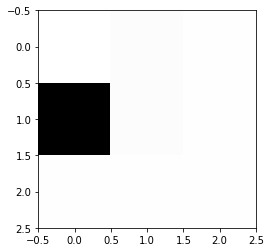

|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.12559511e-49]]
AxesImage(size=(3, 3))


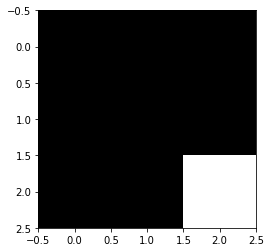

|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  2.93209717e-37  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -4.98750000e-05  0.00000000e+00]]
AxesImage(size=(3, 3))


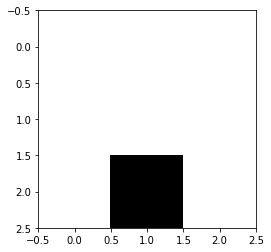

Exploring
|-----------|
| O | X |   |
|-----------|
|   |   |   |
|-----------|
|   | X | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.93209717e-35 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


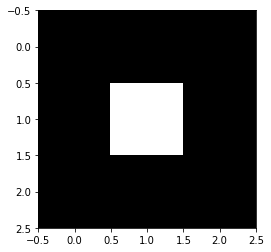

|-----------|
| O | X |   |
|-----------|
|   | O |   |
|-----------|
|   | X | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 6.52011519e-23]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


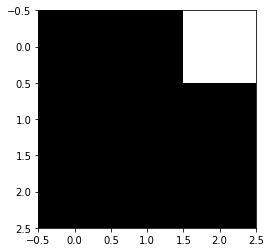

|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
|   | X | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.65780278e-17 0.00000000e+00 0.00000000e+00]]
AxesImage(size=(3, 3))


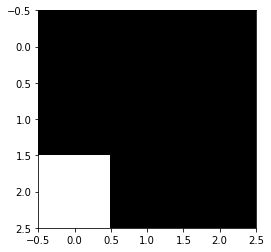

 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [01:00<00:01,  1.22it/s]

|-----------|
| O | X | X |
|-----------|
|   | O |   |
|-----------|
| O | X | X |
|-----------|
Exploring
|-----------|
| O | X | X |
|-----------|
|   | O | X |
|-----------|
| O | X | X |
|-----------|
Winner is: X
X has won the game



Game: 99
Exploiting
State-Values
[[ 6.85353250e-06  1.51136534e-08  0.00000000e+00]
 [-1.27045399e-05  0.00000000e+00  3.11395398e-71]
 [ 5.01262563e-07 -4.98750000e-05  2.73075598e-30]]
AxesImage(size=(3, 3))


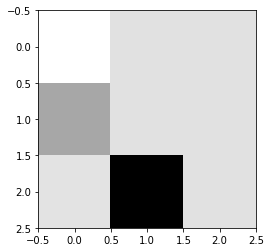

|-----------|
| X |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00 -4.98737562e-07  0.00000000e+00]
 [ 0.00000000e+00  1.25000008e-09  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


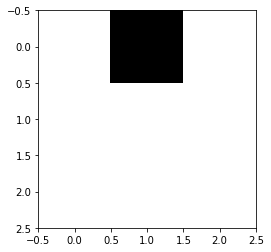

|-----------|
| X |   |   |
|-----------|
|   | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00 -4.98756219e-05]
 [ 5.01250000e-05  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
AxesImage(size=(3, 3))


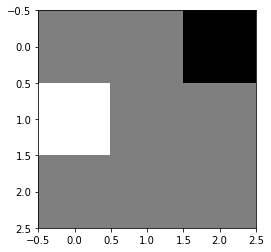

|-----------|
| X |   |   |
|-----------|
| X | O |   |
|-----------|
|   |   |   |
|-----------|
Exploiting
State-Values
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 1.25e-07 0.00e+00]]
AxesImage(size=(3, 3))


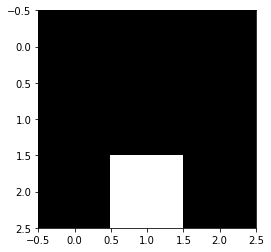

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [01:01<00:00,  1.21it/s]

|-----------|
| X |   |   |
|-----------|
| X | O |   |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X | O | X |
|-----------|
|   | O |   |
|-----------|
Exploring
|-----------|
| X |   |   |
|-----------|
| X | O | X |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| X | O | X |
|-----------|
| O | O |   |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| X | O | X |
|-----------|
| O | O |   |
|-----------|
Winner is: O
O has won the game



Game: 100
Exploring
|-----------|
|   |   |   |
|-----------|
|   |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[ 0.00000000e+00  0.00000000e+00 -5.00000000e-03]
 [ 2.50000000e-03  1.51125000e-04  0.00000000e+00]
 [ 0.00000000e+00  3.05084626e-37  0.00000000e+00]]
AxesImage(size=(3, 3))


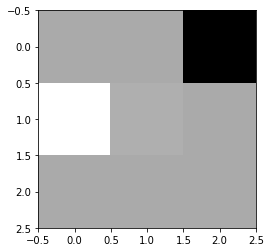

|-----------|
|   |   |   |
|-----------|
| O |   |   |
|-----------|
|   |   | X |
|-----------|
Exploiting
State-Values
[[0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 4.65661522e-106 2.73075598e-028]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]]
AxesImage(size=(3, 3))


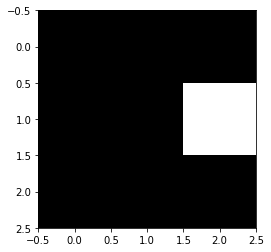

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:01<00:00,  1.62it/s]

|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
|   |   | X |
|-----------|
Exploring
|-----------|
|   |   |   |
|-----------|
| O |   | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
| O |   | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
|   | X |   |
|-----------|
| O | O | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | X |   |
|-----------|
| O | O | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
|   | O | X |
|-----------|
Exploring
|-----------|
| X | X | O |
|-----------|
| O | O | X |
|-----------|
| X | O | X |
|-----------|
Draw
draw has won the game


In [5]:
%time

AI1 = Agent()
AI2 = Agent()

games = 100
Winners = train(games, AI1, AI2)